In [2]:
import fcsparser
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import re
import scipy

import mpl_scatter_density # adds projection='scatter_density'
from matplotlib.colors import LinearSegmentedColormap
from sklearn.preprocessing import MinMaxScaler



In [3]:
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 9
cm = 1/2.54
fig_folder = './Figure_3_exports'
data_folder = '../all_data/Figure_3_data'

In [4]:
flow_paths = glob.glob(data_folder+'/SEC_multi_protein_flow/SEC_multi_protein_flow/*.fcs')

all_data = []

for i,path in enumerate(flow_paths):
    meta, data = fcsparser.parse(path, meta_data_only=False, reformat_meta=True)
    data['flow_number'] = i
    name = path.split('\\')[-1].split('.')[0]
    data['flow_name'] = name
    data[['plate','well_name','DNA_name','Volume','id_num']] = name.split('_')
    data['plate'] = data['plate'].apply(lambda x: int(x[1]))

    all_data.append(data)

all_data = pd.concat(all_data).reset_index(drop=True)
all_data

FSC-H         FSC-A       SSC-H       SSC-A  B-525-40-H  \
0        5030.799805  -5090.000000  421.700012 -158.899994  829.099976   
1        4006.800049  -5570.500000  701.700012  -35.400002  589.099976   
2        6465.100098  -2135.699951  324.000000 -300.500000  272.500000   
3        3441.199951   -264.000000  395.399994   -3.800000  751.099976   
4        9656.500000   5743.700195  104.099998 -121.300003  457.600006   
...              ...           ...         ...         ...         ...   
7847977  3946.800049  -7648.299805  475.399994 -119.099998  356.200012   
7847978  5221.399902  -2799.500000  300.899994 -493.500000  727.700012   
7847979  5313.000000   1854.400024  438.600006 -381.500000  384.299988   
7847980  1511.699951 -10991.799805  290.600006  -81.900002  592.000000   
7847981  2082.300049  -3510.600098  263.600006  -21.200001  664.599976   

         B-525-40-A  B-690-50-H  B-690-50-A   R-660-20-H   R-660-20-A  ...  \
0        539.500000  263.299988    0.700000  2600.199951   975.299988  ...   
1        248.500000  199.300003  -60.799999  2208.199951  1222.300049  ...   
2       -167.000000  210.199997   88.400002  2132.699951   817.500000  ...   
3        534.799988  581.900024  130.800003  2210.300049  1081.800049  ...   
4       -148.000000  215.199997 -245.500000  2019.599976  1068.599976  ...   
...             ...         ...         ...          ...          ...  ...   
7847977 -266.600006  476.399994  315.200012  2060.800049  1079.900024  ...   
7847978 -290.399994  308.600006  256.299988  2107.500000  1438.400024  ...   
7847979 -635.200012  258.700012   84.400002  2232.100098  1297.300049  ...   
7847980  495.799988  320.899994  -17.200001  2906.000000  1147.099976  ...   
7847981  233.199997  154.500000 -191.000000  2039.699951  1148.800049  ...   

         Y-780-60-A  405-10-Width           Time  flow_number  \
0         -9.000000   -396.369751    1560.005005            0   
1        -89.500000   -475.909760    3326.004883            0   
2       -341.600006    -29.440001    3735.004883            0   
3         32.099998  -2267.234131    5324.004883            0   
4       -179.000000    169.739136    6437.004883            0   
...             ...           ...            ...          ...   
7847977   83.699997   -987.555542  749450.000000           67   
7847978   83.699997 -10496.000000  749491.000000           67   
7847979 -180.500000   -409.858582  749604.000000           67   
7847980   29.000000    506.434784  749859.000000           67   
7847981  294.500000    395.755096  749870.000000           67   

                         flow_name  plate  well_name      DNA_name  Volume  \
0                 p1_A10_Mito_0_18      1        A10          Mito       0   
1                 p1_A10_Mito_0_18      1        A10          Mito       0   
2                 p1_A10_Mito_0_18      1        A10          Mito       0   
3                 p1_A10_Mito_0_18      1        A10          Mito       0   
4                 p1_A10_Mito_0_18      1        A10          Mito       0   
...                            ...    ...        ...           ...     ...   
7847977  p3_A2_control-DOPC_1200_5      3         A2  control-DOPC    1200   
7847978  p3_A2_control-DOPC_1200_5      3         A2  control-DOPC    1200   
7847979  p3_A2_control-DOPC_1200_5      3         A2  control-DOPC    1200   
7847980  p3_A2_control-DOPC_1200_5      3         A2  control-DOPC    1200   
7847981  p3_A2_control-DOPC_1200_5      3         A2  control-DOPC    1200   

         id_num  
0            18  
1            18  
2            18  
3            18  
4            18  
...         ...  
7847977       5  
7847978       5  
7847979       5  
7847980       5  
7847981       5  

[7847982 rows x 39 columns]

In [5]:
meta = pd.read_excel(data_folder+'./SEC-plate_reader_data.xlsx')
meta

DNA_name Liposome_name  Volume well_name  rep    GFP   Cy5  plate
0        Cat          DOPC       0        A1    1  64581  1074      1
1        Cat          DOPC       0        A2    2  62707  1075      1
2        Cat          DOPC       0        A3    3  59499   972      1
3        Cat          DOPC     500        B1    1     67     1      1
4        Cat          DOPC     500        B2    2     65     0      1
..       ...           ...     ...       ...  ...    ...   ...    ...
523    Blank          DMPC    3600       O11    2    771     4      2
524    Blank          DMPC    3600       O12    3    576     3      2
525    Blank          DMPC    4100       P10    1     98     4      2
526    Blank          DMPC    4100       P11    2    118     3      2
527    Blank          DMPC    4100       P12    3    116     3      2

[528 rows x 8 columns]

In [6]:
all_data = all_data.set_index(['plate','well_name']).join(meta.set_index(['plate','well_name']),rsuffix='_meta').reset_index()
all_data

plate well_name        FSC-H         FSC-A       SSC-H       SSC-A  \
0            1       A10  5030.799805  -5090.000000  421.700012 -158.899994   
1            1       A10  4006.800049  -5570.500000  701.700012  -35.400002   
2            1       A10  6465.100098  -2135.699951  324.000000 -300.500000   
3            1       A10  3441.199951   -264.000000  395.399994   -3.800000   
4            1       A10  9656.500000   5743.700195  104.099998 -121.300003   
...        ...       ...          ...           ...         ...         ...   
7847977      3        A2  3946.800049  -7648.299805  475.399994 -119.099998   
7847978      3        A2  5221.399902  -2799.500000  300.899994 -493.500000   
7847979      3        A2  5313.000000   1854.400024  438.600006 -381.500000   
7847980      3        A2  1511.699951 -10991.799805  290.600006  -81.900002   
7847981      3        A2  2082.300049  -3510.600098  263.600006  -21.200001   

         B-525-40-H  B-525-40-A  B-690-50-H  B-690-50-A  ...  \
0        829.099976  539.500000  263.299988    0.700000  ...   
1        589.099976  248.500000  199.300003  -60.799999  ...   
2        272.500000 -167.000000  210.199997   88.400002  ...   
3        751.099976  534.799988  581.900024  130.800003  ...   
4        457.600006 -148.000000  215.199997 -245.500000  ...   
...             ...         ...         ...         ...  ...   
7847977  356.200012 -266.600006  476.399994  315.200012  ...   
7847978  727.700012 -290.399994  308.600006  256.299988  ...   
7847979  384.299988 -635.200012  258.700012   84.400002  ...   
7847980  592.000000  495.799988  320.899994  -17.200001  ...   
7847981  664.599976  233.199997  154.500000 -191.000000  ...   

                         flow_name      DNA_name  Volume  id_num  \
0                 p1_A10_Mito_0_18          Mito       0      18   
1                 p1_A10_Mito_0_18          Mito       0      18   
2                 p1_A10_Mito_0_18          Mito       0      18   
3                 p1_A10_Mito_0_18          Mito       0      18   
4                 p1_A10_Mito_0_18          Mito       0      18   
...                            ...           ...     ...     ...   
7847977  p3_A2_control-DOPC_1200_5  control-DOPC    1200       5   
7847978  p3_A2_control-DOPC_1200_5  control-DOPC    1200       5   
7847979  p3_A2_control-DOPC_1200_5  control-DOPC    1200       5   
7847980  p3_A2_control-DOPC_1200_5  control-DOPC    1200       5   
7847981  p3_A2_control-DOPC_1200_5  control-DOPC    1200       5   

         DNA_name_meta  Liposome_name  Volume_meta  rep      GFP    Cy5  
0                 Mito           DOPC          0.0  1.0  20284.0  921.0  
1                 Mito           DOPC          0.0  1.0  20284.0  921.0  
2                 Mito           DOPC          0.0  1.0  20284.0  921.0  
3                 Mito           DOPC          0.0  1.0  20284.0  921.0  
4                 Mito           DOPC          0.0  1.0  20284.0  921.0  
...                ...            ...          ...  ...      ...    ...  
7847977            NaN            NaN          NaN  NaN      NaN    NaN  
7847978            NaN            NaN          NaN  NaN      NaN    NaN  
7847979            NaN            NaN          NaN  NaN      NaN    NaN  
7847980            NaN            NaN          NaN  NaN      NaN    NaN  
7847981            NaN            NaN          NaN  NaN      NaN    NaN  

[7847982 rows x 45 columns]

In [7]:
all_data['B-525-40-A'] = all_data['B-525-40-A'].clip(10**-3,10**8)
all_data['R-660-20-A'] = all_data['R-660-20-A'].clip(10**-3,10**8)
all_data['SSC-A'] = all_data['SSC-A'].clip(10**-3,10**8)

In [7]:
all_data.columns

Index(['plate', 'well_name', 'FSC-H', 'FSC-A', 'SSC-H', 'SSC-A', 'B-525-40-H',
       'B-525-40-A', 'B-690-50-H', 'B-690-50-A', 'R-660-20-H', 'R-660-20-A',
       'R-712-25-H', 'R-712-25-A', 'R-780-60-H', 'R-780-60-A', '405-10-H',
       '405-10-A', 'V-450-45-H', 'V-450-45-A', 'V-610-20-H', 'V-610-20-A',
       'V-660-20-H', 'V-660-20-A', 'Y-585-42-H', 'Y-585-42-A', 'Y-610-20-H',
       'Y-610-20-A', 'Y-690-50-H', 'Y-690-50-A', 'Y-780-60-H', 'Y-780-60-A',
       '405-10-Width', 'Time', 'flow_number', 'flow_name', 'DNA_name',
       'Volume', 'id_num', 'DNA_name_meta', 'Liposome_name', 'Volume_meta',
       'rep', 'GFP', 'Cy5'],
      dtype='object')

c:\Users\conar\Memplex_platform\analysis_env\Lib\site-packages\mpl_scatter_density\generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
c:\Users\conar\Memplex_platform\analysis_env\Lib\site-packages\mpl_scatter_density\generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


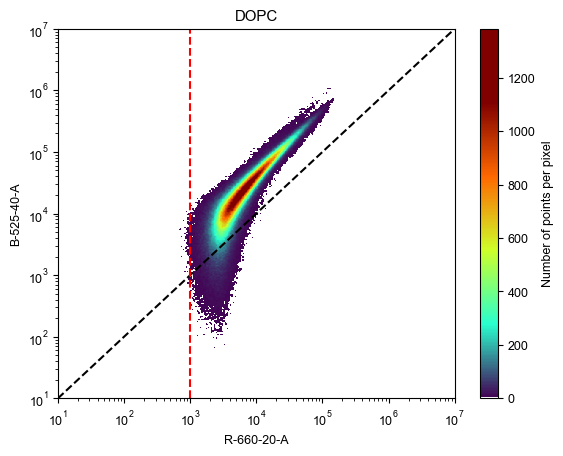

In [8]:
white_jet = LinearSegmentedColormap.from_list('white_jet', [
    (0, '#ffffff'),
    (1e-20, '#440053'),
    (0.2, '#29ffce'),
    (0.4, '#ceff29'),
    (0.6, '#ff6800'),
    (0.8, '#800000'),
    (1, '#800000'),
], N=256)

def using_mpl_scatter_density(fig, x, y):
    ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
    density = ax.scatter_density(x, y, cmap=white_jet)
    plt.xscale('log')
    plt.yscale('log')

    plt.xlim([10**1,10**7])
    plt.ylim([10,10**7])

    fig.colorbar(density, label='Number of points per pixel')

x_label = 'R-660-20-A'
y_label = 'B-525-40-A'



for dna,df in all_data[all_data['DNA_name_meta'] == 'Beta'].groupby('Liposome_name'):
    x = np.array(df[x_label].tolist())
    y = np.array(df[y_label].tolist())
    
    fig = plt.figure()
    using_mpl_scatter_density(fig, x, y)
    plt.title(dna)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.plot([10**1,10**7],[10**1,10**7],c='k',ls='--')
    plt.axvline(10**3,ls='--',c='red')
    
    
    plt.show()


In [9]:
all_data.columns

Index(['plate', 'well_name', 'FSC-H', 'FSC-A', 'SSC-H', 'SSC-A', 'B-525-40-H',
       'B-525-40-A', 'B-690-50-H', 'B-690-50-A', 'R-660-20-H', 'R-660-20-A',
       'R-712-25-H', 'R-712-25-A', 'R-780-60-H', 'R-780-60-A', '405-10-H',
       '405-10-A', 'V-450-45-H', 'V-450-45-A', 'V-610-20-H', 'V-610-20-A',
       'V-660-20-H', 'V-660-20-A', 'Y-585-42-H', 'Y-585-42-A', 'Y-610-20-H',
       'Y-610-20-A', 'Y-690-50-H', 'Y-690-50-A', 'Y-780-60-H', 'Y-780-60-A',
       '405-10-Width', 'Time', 'flow_number', 'flow_name', 'DNA_name',
       'Volume', 'id_num', 'DNA_name_meta', 'Liposome_name', 'Volume_meta',
       'rep', 'GFP', 'Cy5'],
      dtype='object')

### Define criteria for liposomes
* Setting the criteria as a range of Cy5/SSC because there should be a roughly normal distribution of Cy5 on a given size of liposome
* By looking for ones that fit that criteria it gets rid of large events that have minimal Cy5

c:\Users\conar\Memplex_platform\analysis_env\Lib\site-packages\mpl_scatter_density\generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
c:\Users\conar\Memplex_platform\analysis_env\Lib\site-packages\mpl_scatter_density\generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


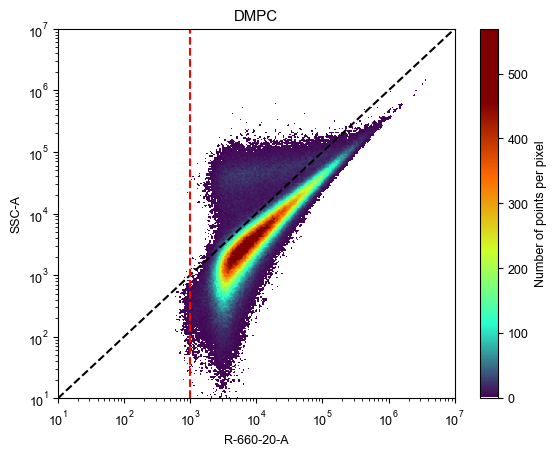

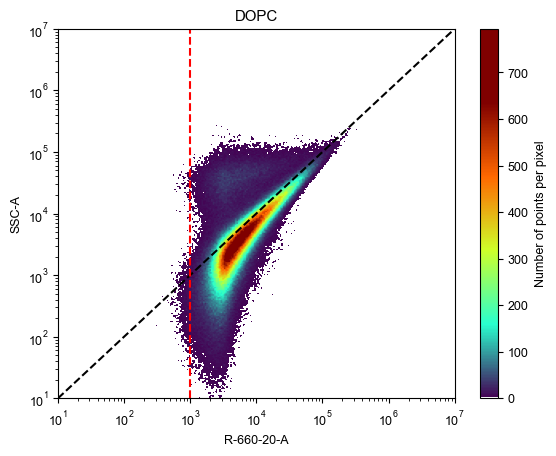

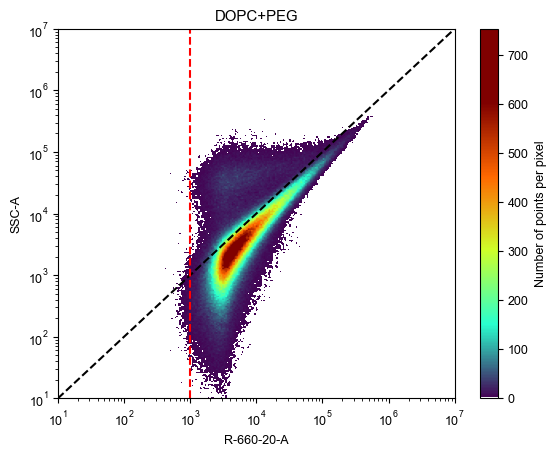

In [10]:
x_label = 'R-660-20-A'
y_label = 'SSC-A'

for dna,df in all_data[all_data['DNA_name_meta'] == 'Cat'].groupby('Liposome_name'):
    x = np.array(df[x_label].tolist())
    y = np.array(df[y_label].tolist())
    
    fig = plt.figure()
    using_mpl_scatter_density(fig, x, y)
    plt.title(dna)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.plot([10**1,10**7],[10**1,10**7],c='k',ls='--')
    plt.axvline(10**3,ls='--',c='red')
    
    
    plt.show()


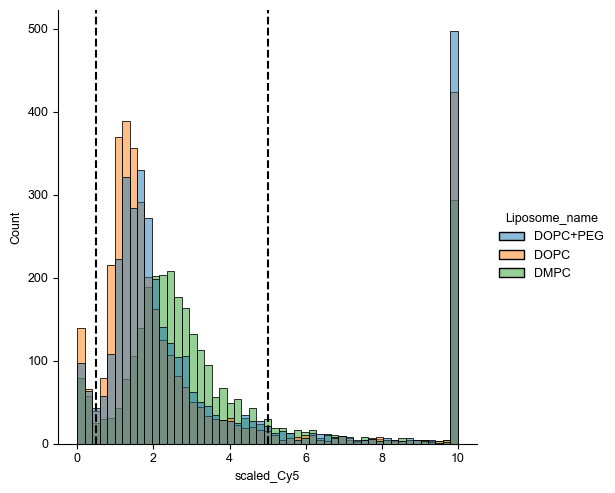

In [11]:
x_label = 'R-660-20-A'
y_label = 'SSC-A'
temp = all_data[all_data['DNA_name_meta'] == 'Cat'].sample(10000)
temp['scaled_Cy5'] = temp[x_label] / temp[y_label] 
temp['scaled_Cy5'].describe()
temp['scaled_Cy5'] = temp['scaled_Cy5'].clip(0,10)
sns.displot(data=temp,x='scaled_Cy5',hue='Liposome_name',)
lipo_low = 0.5
lipo_high = 5
plt.axvline(lipo_low,color='black',ls='--')
plt.axvline(lipo_high,color='black',ls='--')
plt.show()

c:\Users\conar\Memplex_platform\analysis_env\Lib\site-packages\mpl_scatter_density\generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
c:\Users\conar\Memplex_platform\analysis_env\Lib\site-packages\mpl_scatter_density\generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


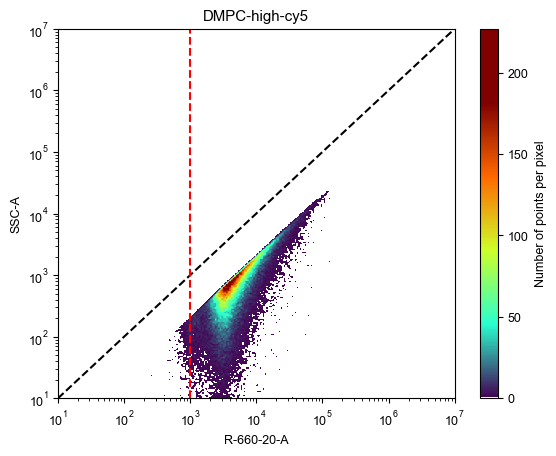

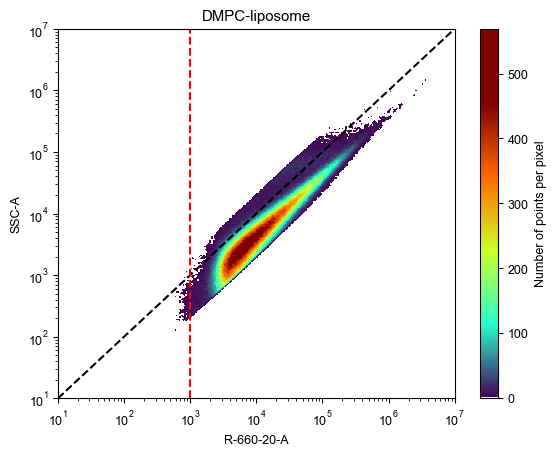

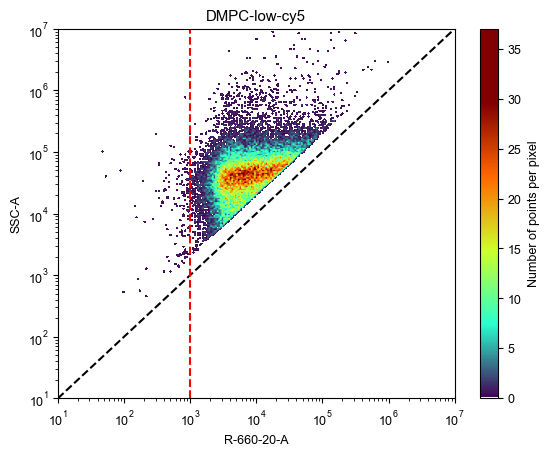

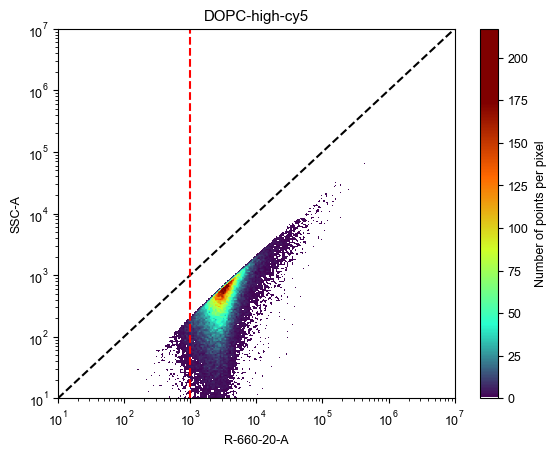

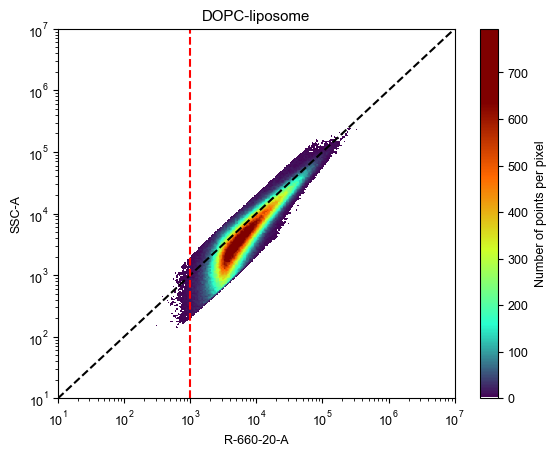

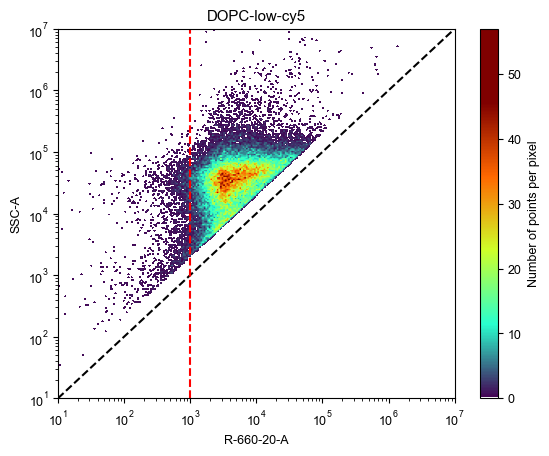

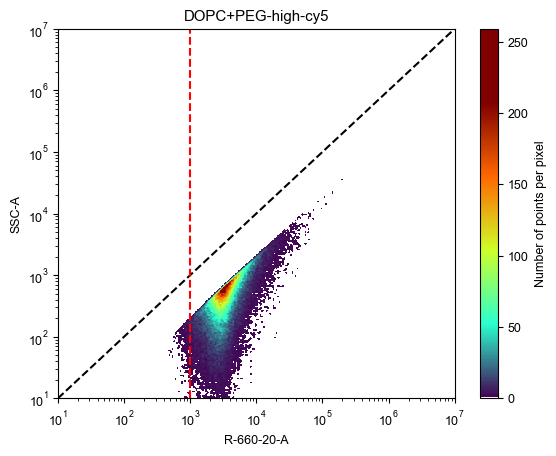

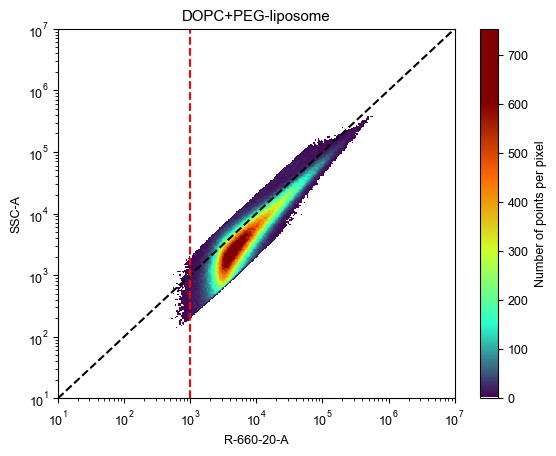

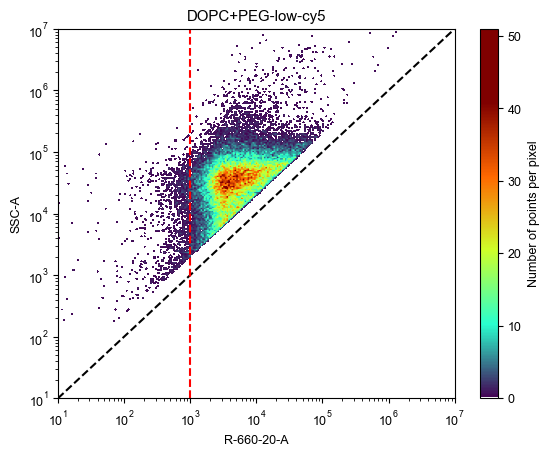

In [12]:
def assign_lipo(scaled,high=5,low=0.5):
    if scaled > high:
        return 'high-cy5'
    elif scaled > low:
        return 'liposome'
    else:
        return 'low-cy5'
    
    
    
all_data['scaled_Cy5'] = all_data['R-660-20-A'] / all_data['SSC-A'] 
all_data['lipo_class'] = all_data['scaled_Cy5'].apply(assign_lipo,high=lipo_high,low=lipo_low)

x_label = 'R-660-20-A'
y_label = 'SSC-A'

for [lipo,label],df in all_data[(all_data['DNA_name_meta'] == 'Cat')].groupby(['Liposome_name','lipo_class']):
    x = np.array(df[x_label].tolist())
    y = np.array(df[y_label].tolist())
    
    fig = plt.figure()
    using_mpl_scatter_density(fig, x, y)
    plt.title(f'{lipo}-{label}')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.plot([10**1,10**7],[10**1,10**7],c='k',ls='--')
    plt.axvline(10**3,ls='--',c='red')
    
    
    plt.show()


c:\Users\conar\Memplex_platform\analysis_env\Lib\site-packages\mpl_scatter_density\generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
c:\Users\conar\Memplex_platform\analysis_env\Lib\site-packages\mpl_scatter_density\generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


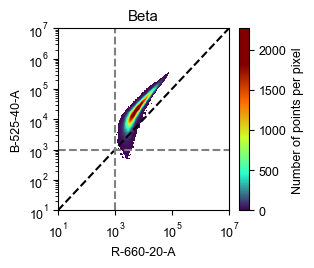

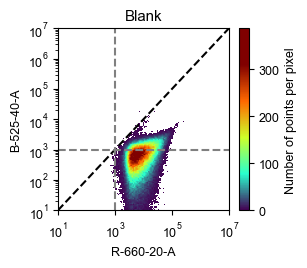

In [13]:
x_label = 'R-660-20-A'
y_label = 'B-525-40-A'

names = []

for dna,df in all_data[(all_data['lipo_class'] == 'liposome') & (all_data['DNA_name'].isin(['Beta','Blank'])) & (all_data['Volume_meta'] == 1200)].groupby('DNA_name'):
    x = np.array(df[x_label].tolist())
    y = np.array(df[y_label].tolist())
    
    fig = plt.figure(figsize=[7*cm,6*cm])
    using_mpl_scatter_density(fig, x, y)
    plt.title(dna)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.plot([10**1,10**7],[10**1,10**7],c='k',ls='--')
    # plt.axhline(10**4,ls='--',c='red')
    plt.axhline(10**3,ls='--',c='grey')
    plt.axvline(10**3,ls='--',c='grey')
    
    # plt.savefig(f'./Supp_fig-{dna}_flow_raw.svg',format='svg',dpi=300)

    plt.show()

In [14]:
export = all_data[(all_data['lipo_class'] == 'liposome') & (all_data['DNA_name'].isin(['Beta','Blank'])) & (all_data['Volume_meta'] == 1200)]
export = export[['SSC-A','R-660-20-A','B-525-40-A', 'DNA_name',
       'rep', 'Volume', 'scaled_Cy5']].copy()
# export.set_index('DNA_name').to_pickle('./Supp_Fig_15B-Additional_prot_flow_samples.pkl')

c:\Users\conar\Memplex_platform\analysis_env\Lib\site-packages\mpl_scatter_density\generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
c:\Users\conar\Memplex_platform\analysis_env\Lib\site-packages\mpl_scatter_density\generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


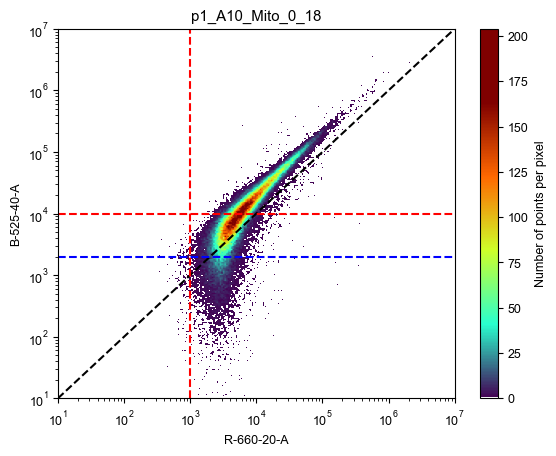

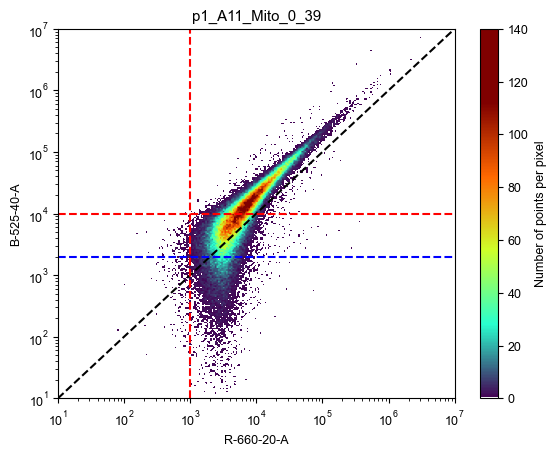

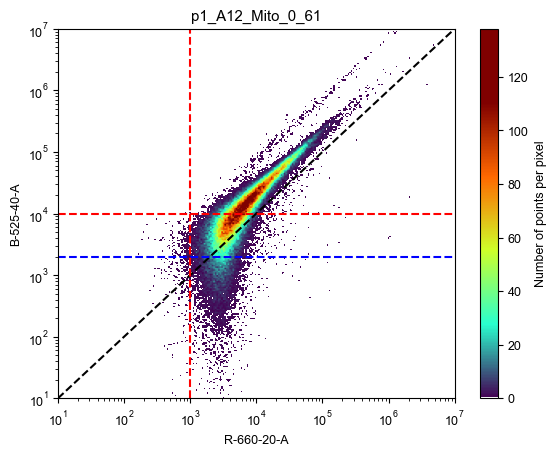

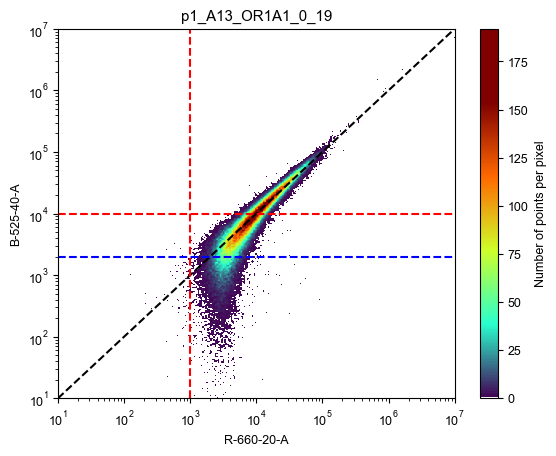

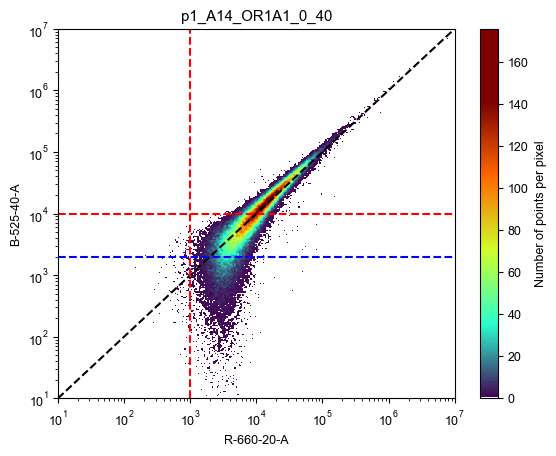

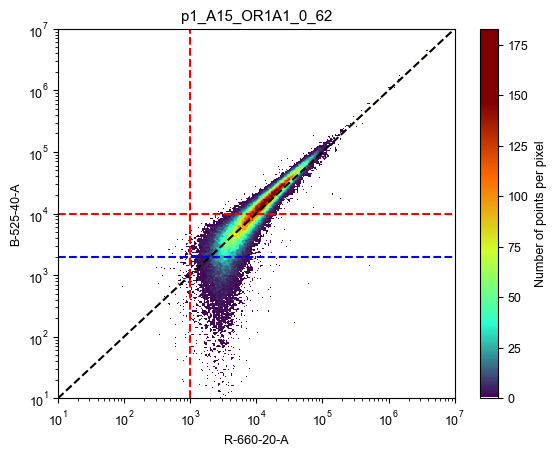

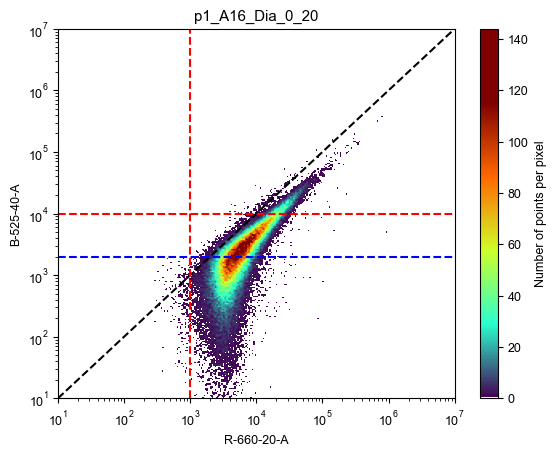

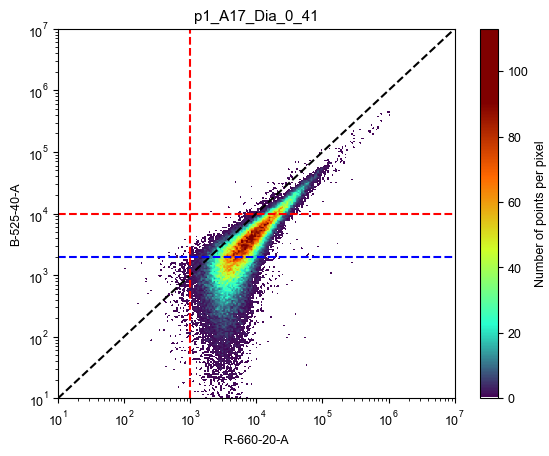

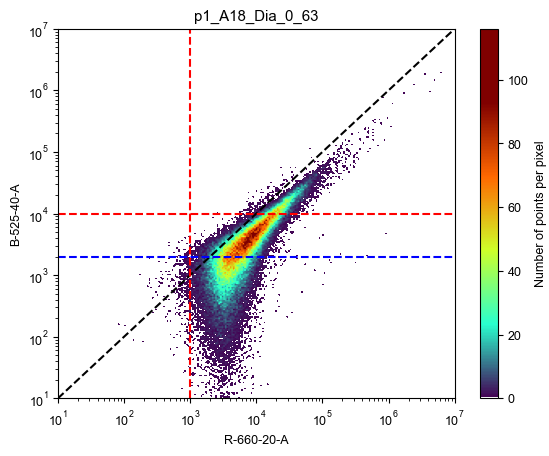

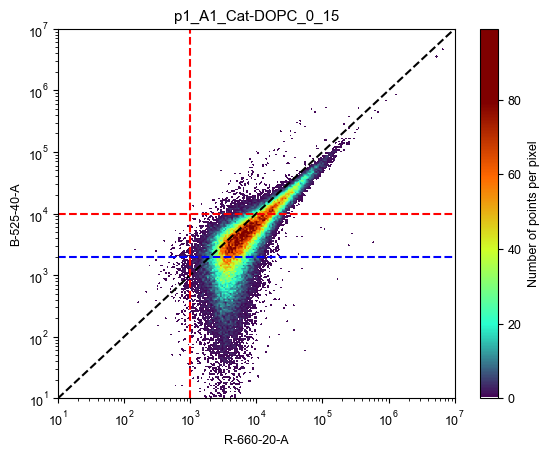

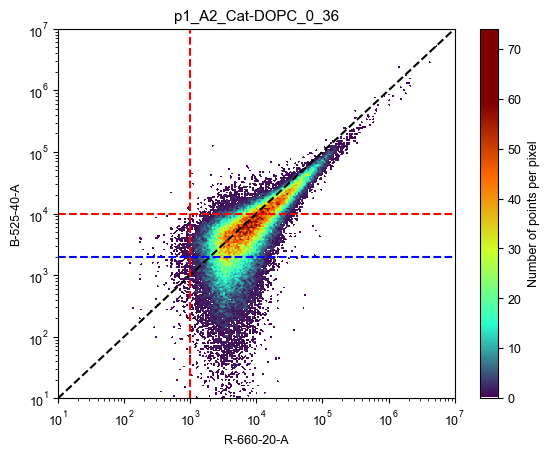

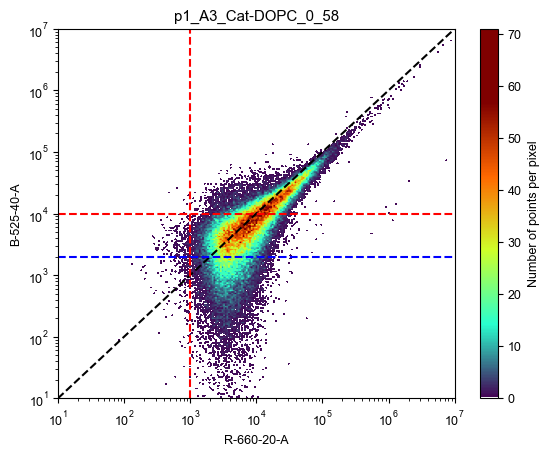

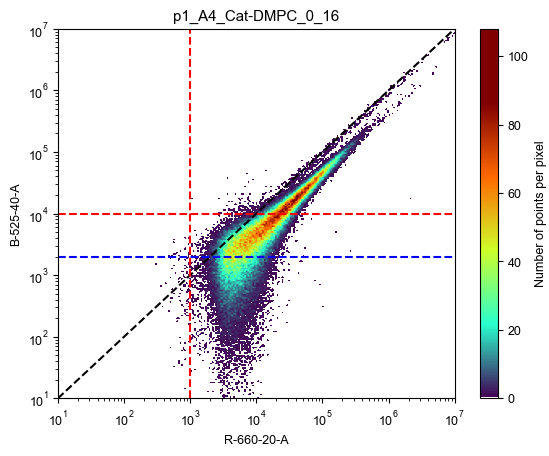

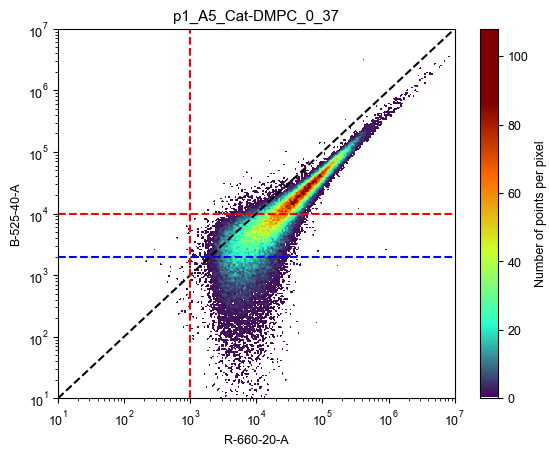

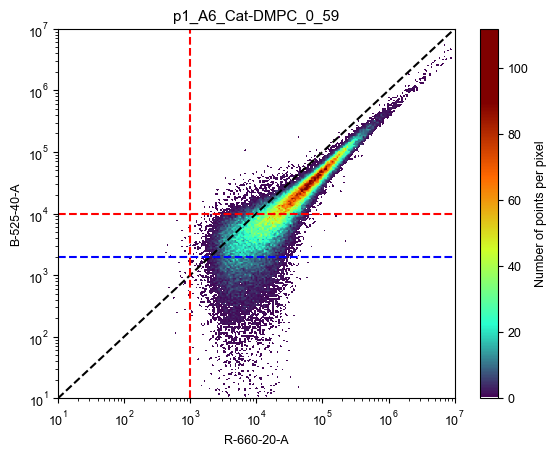

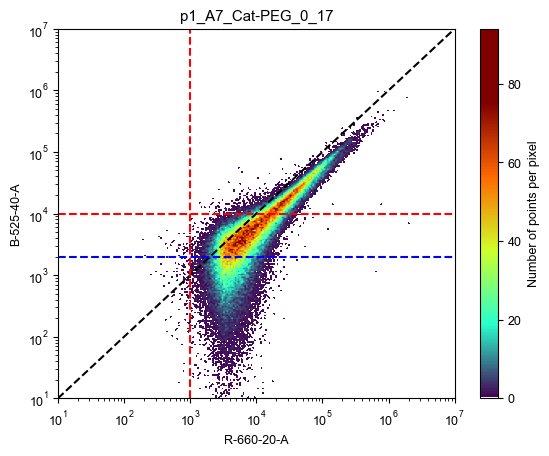

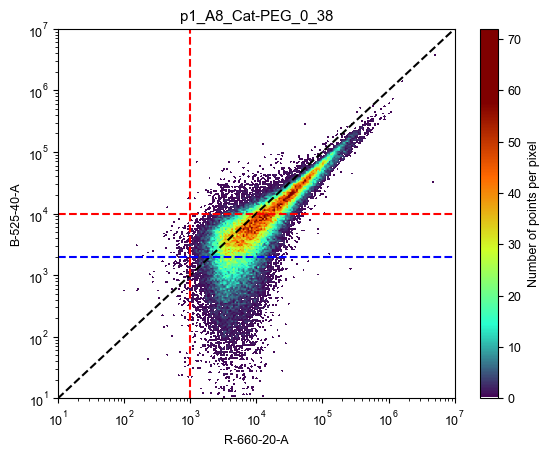

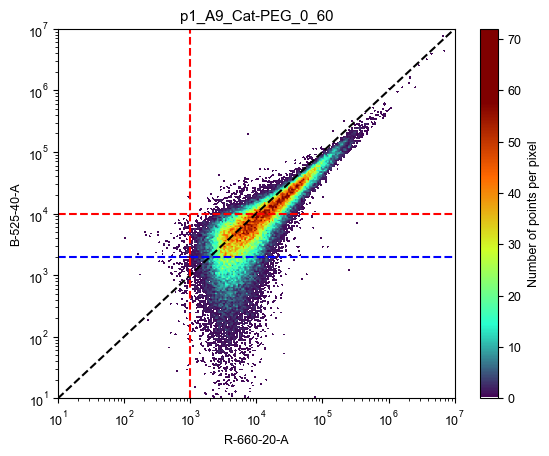

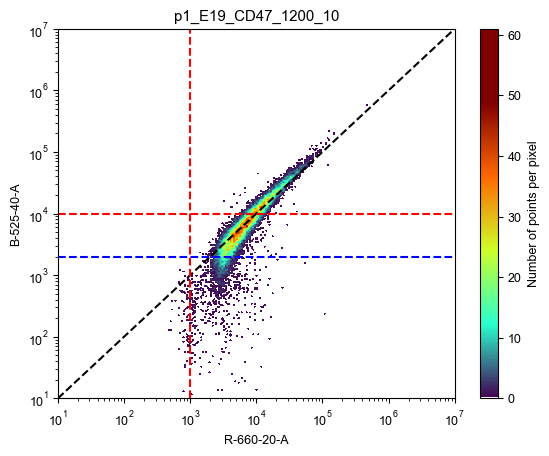

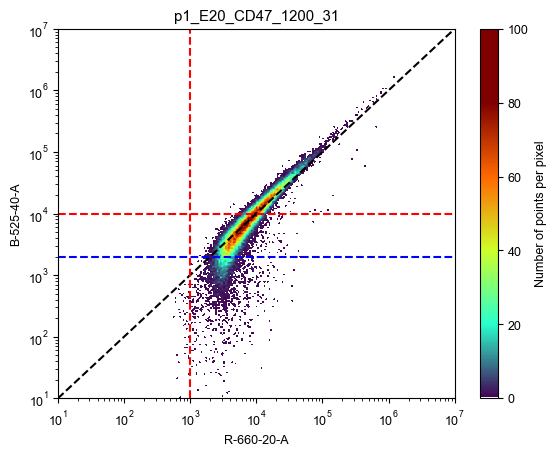

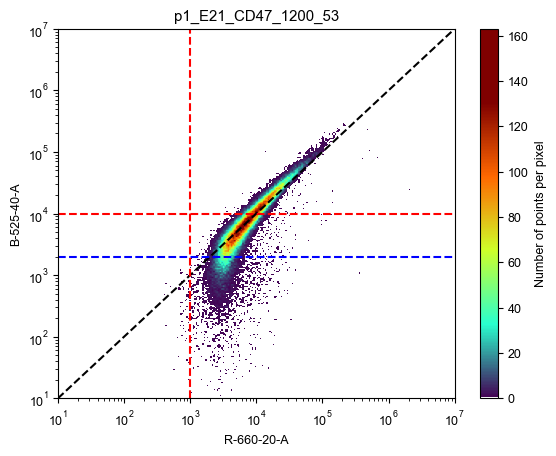

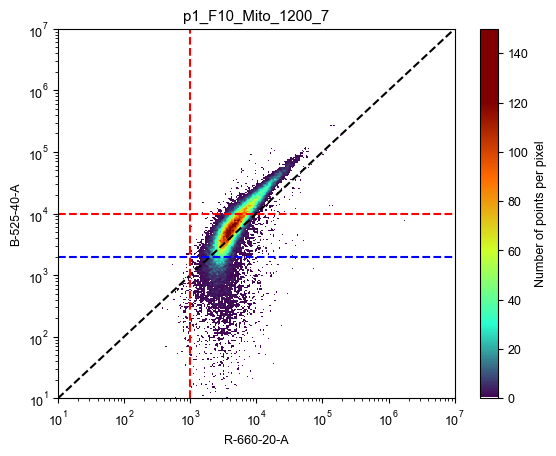

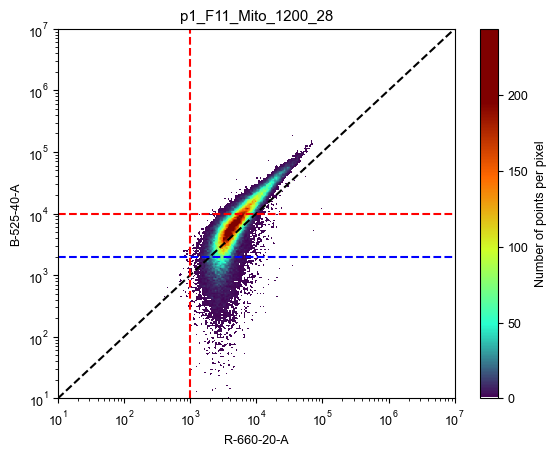

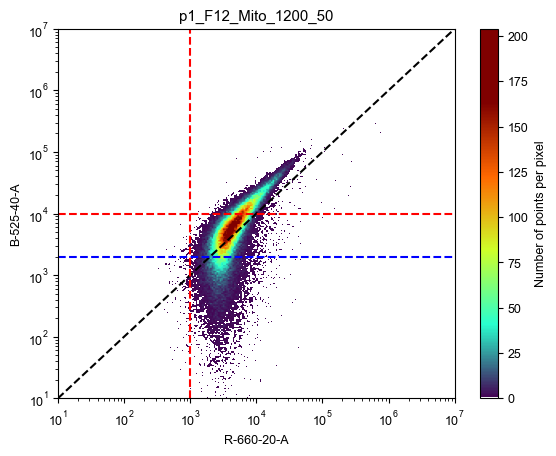

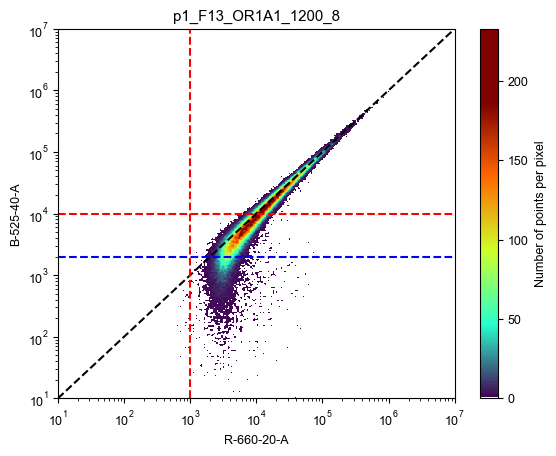

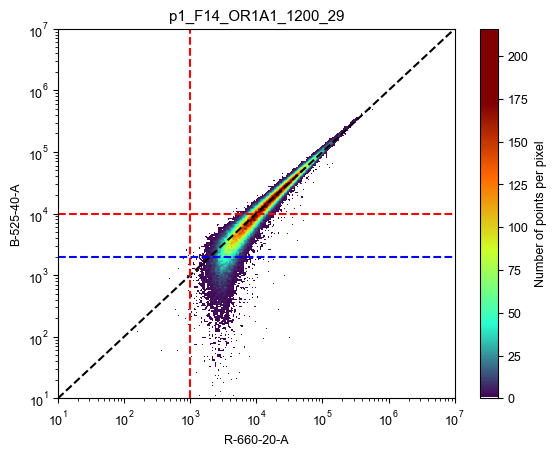

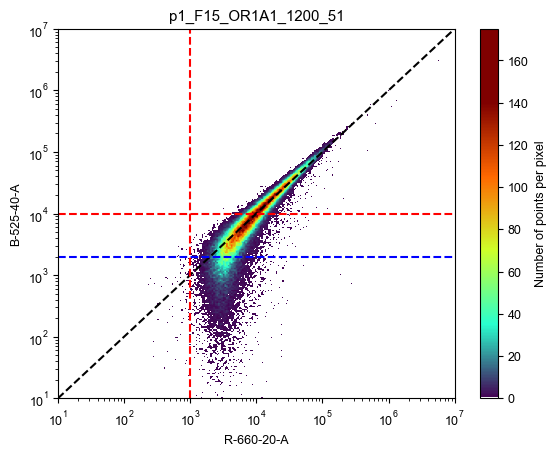

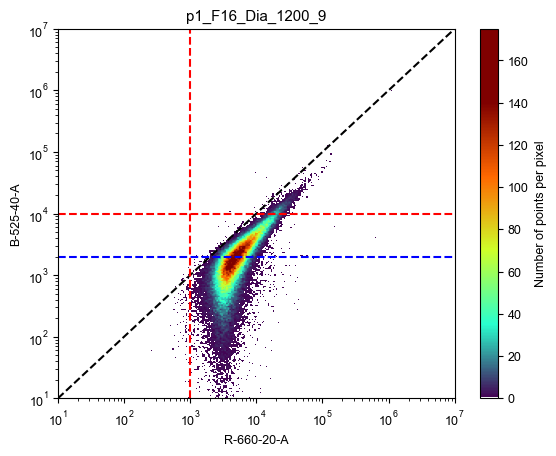

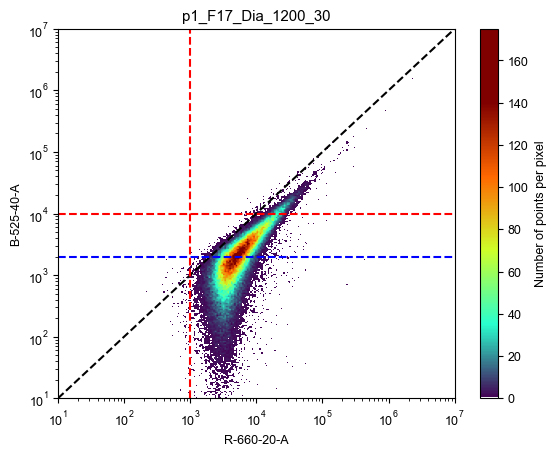

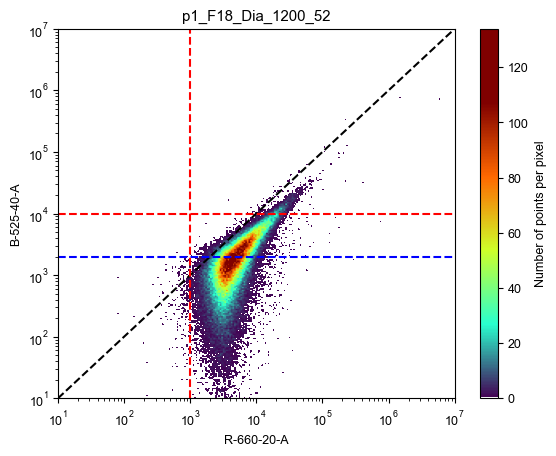

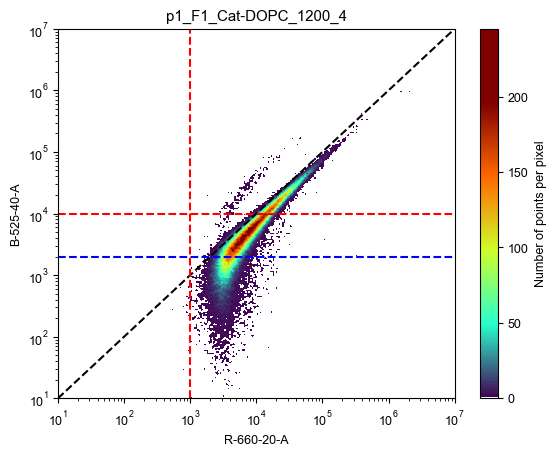

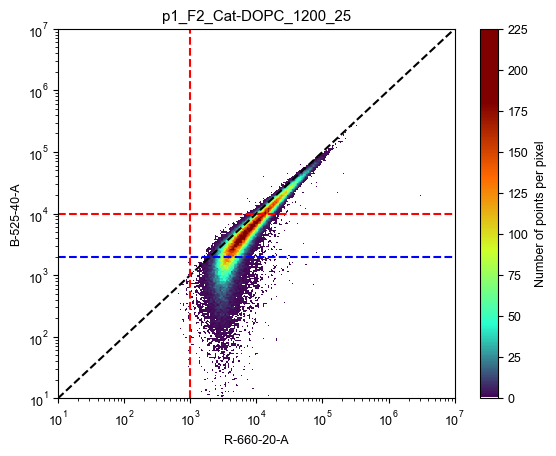

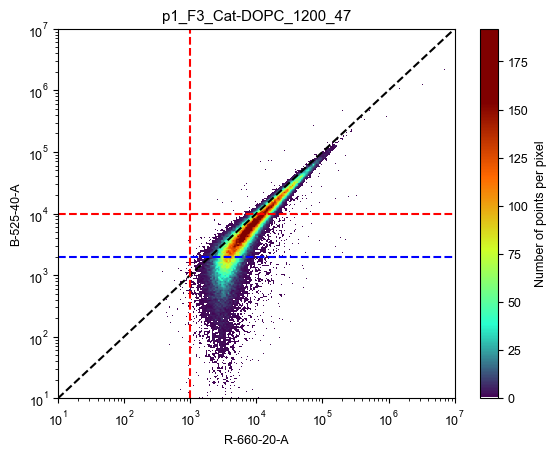

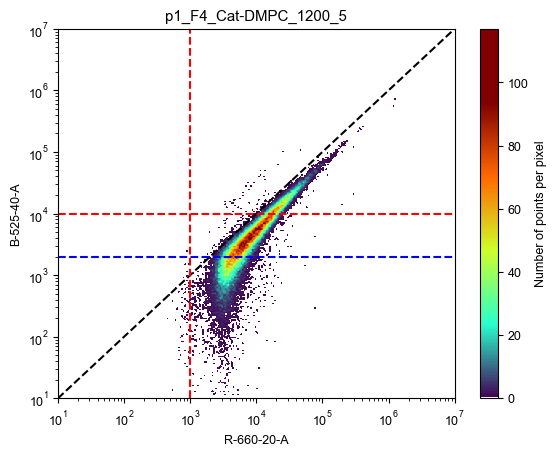

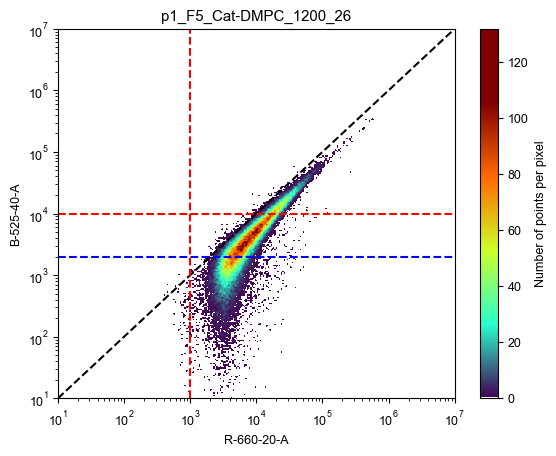

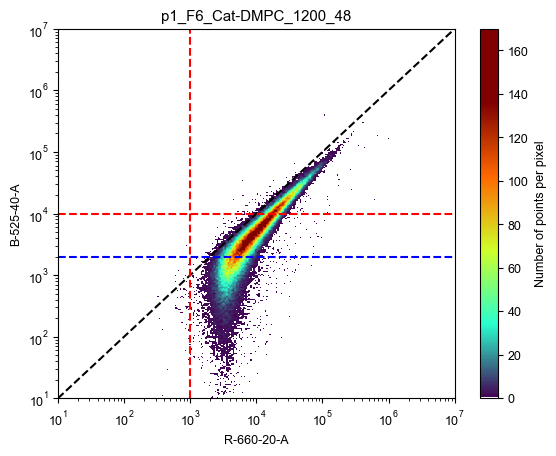

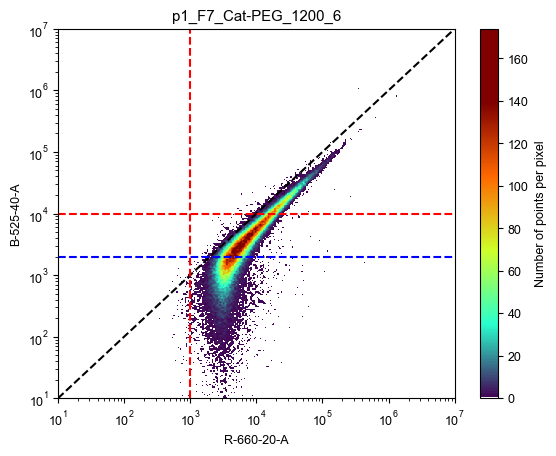

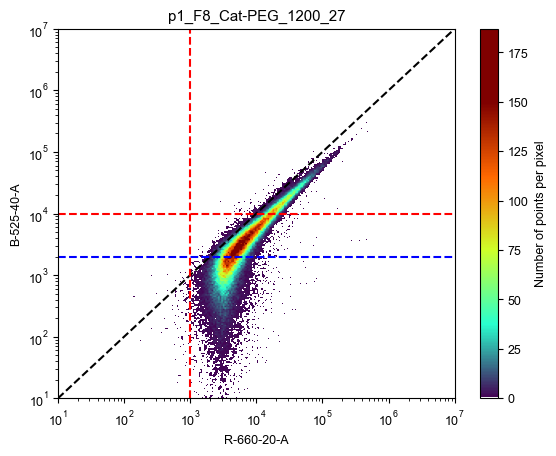

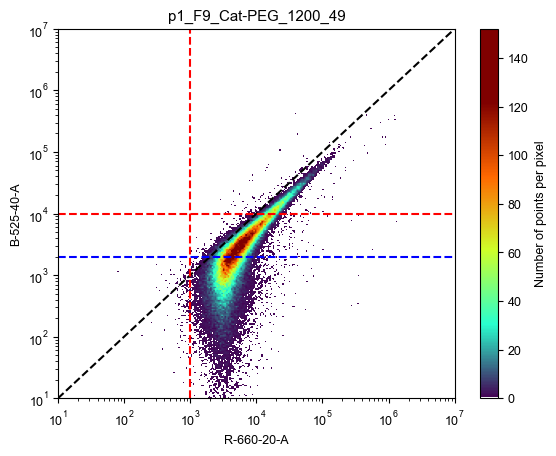

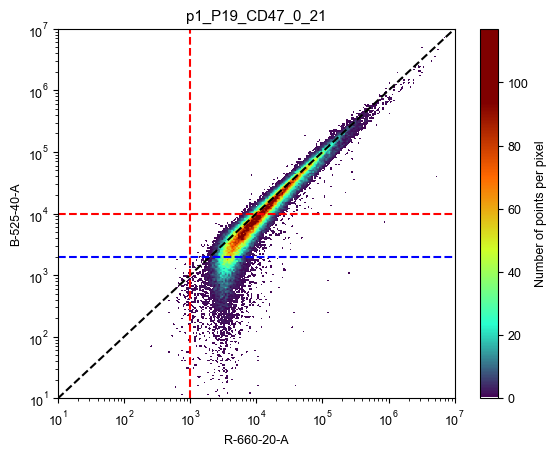

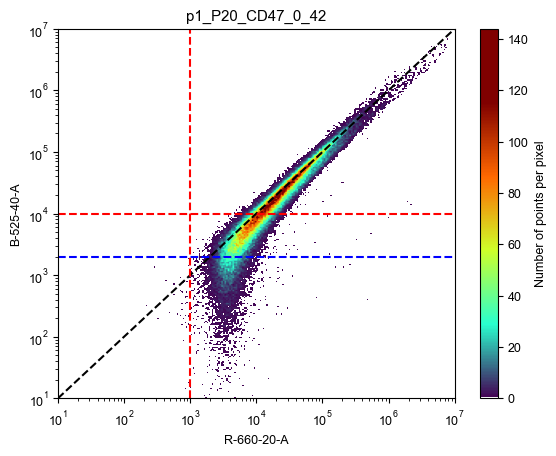

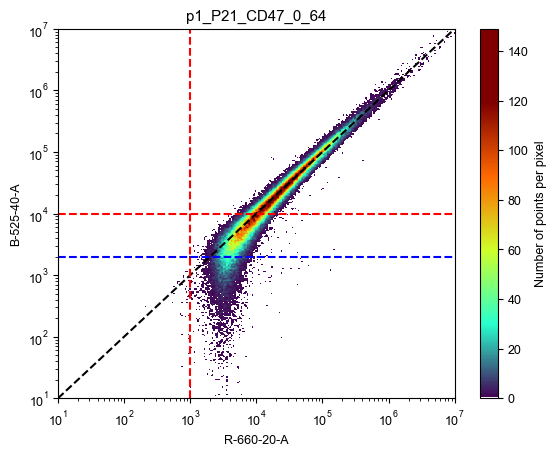

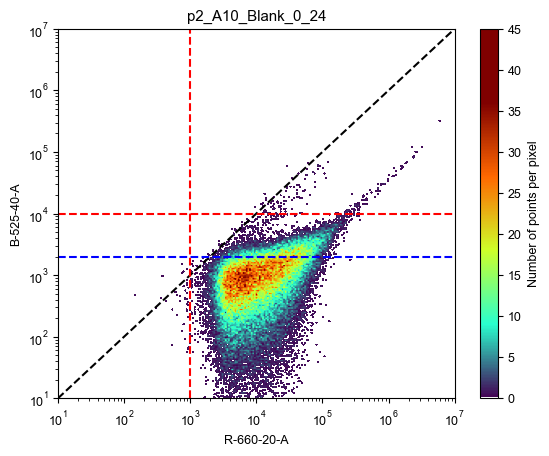

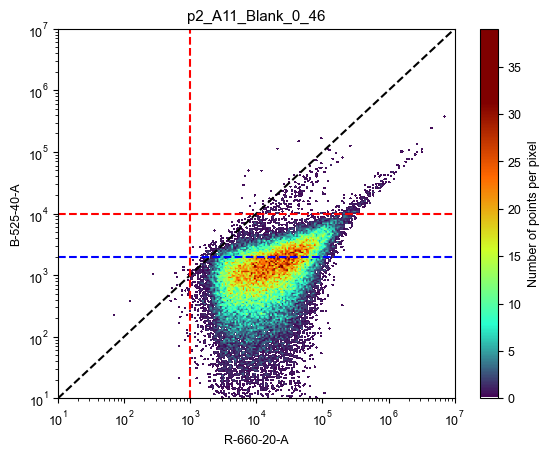

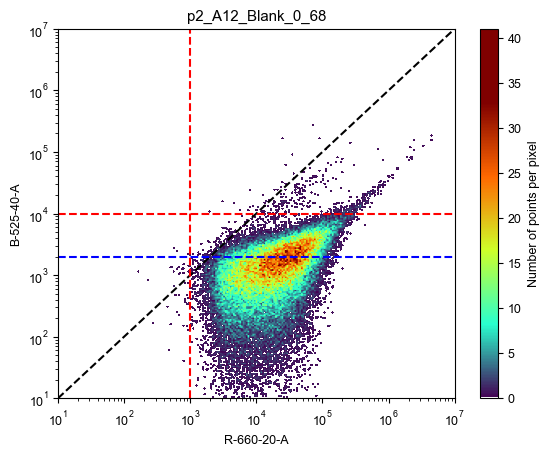

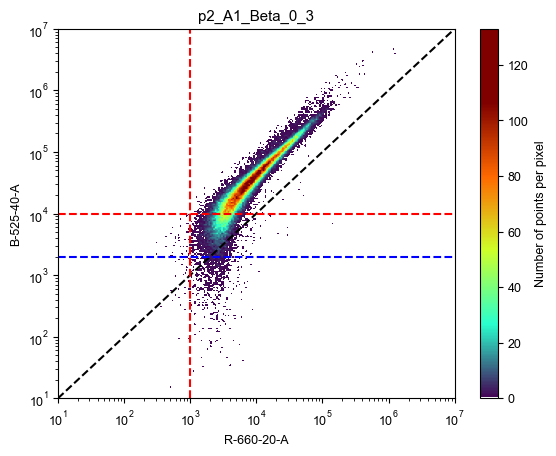

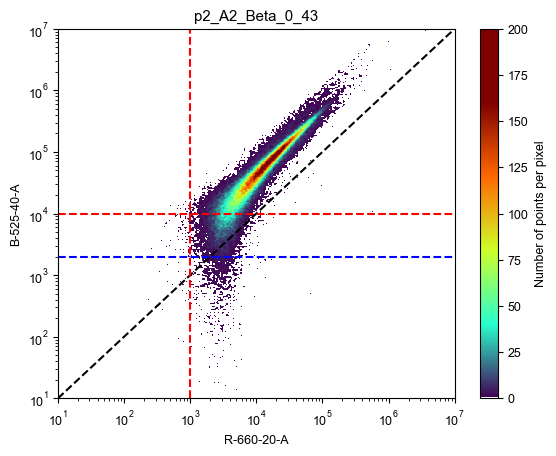

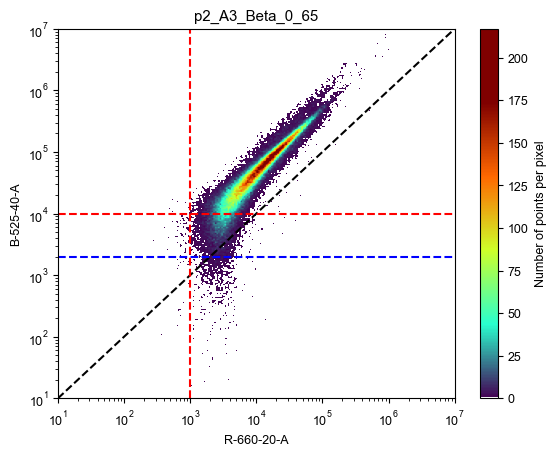

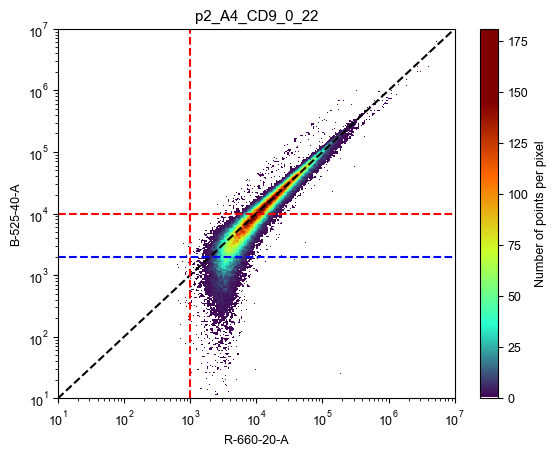

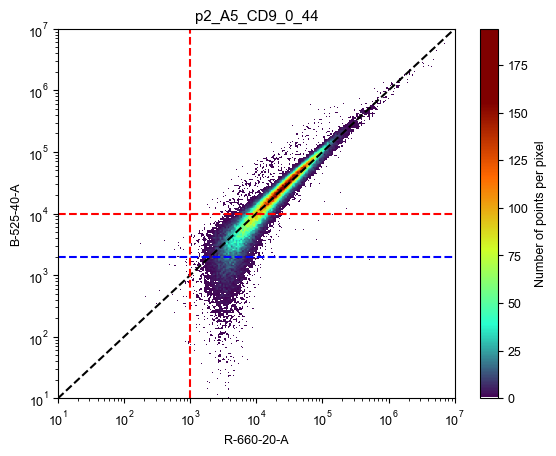

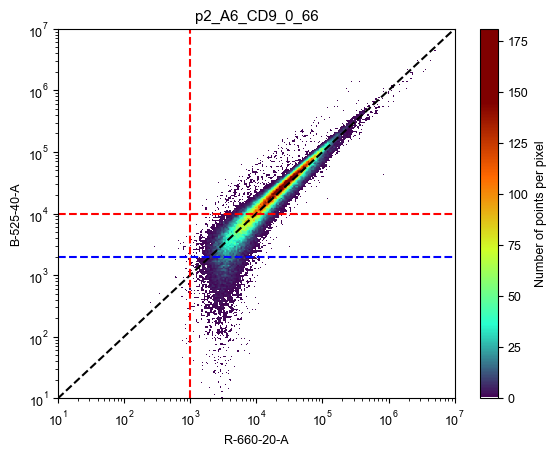

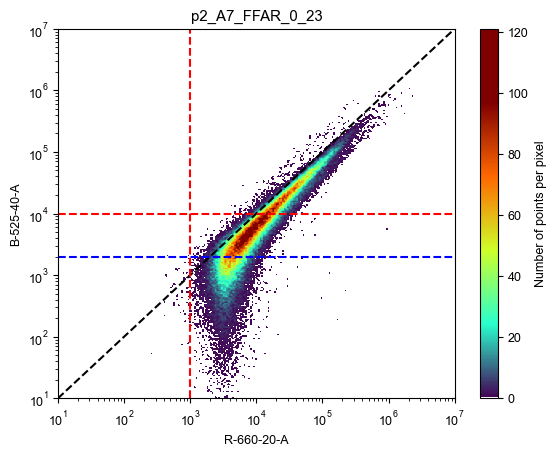

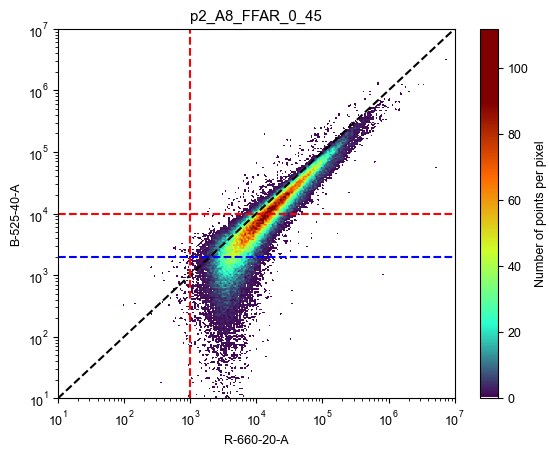

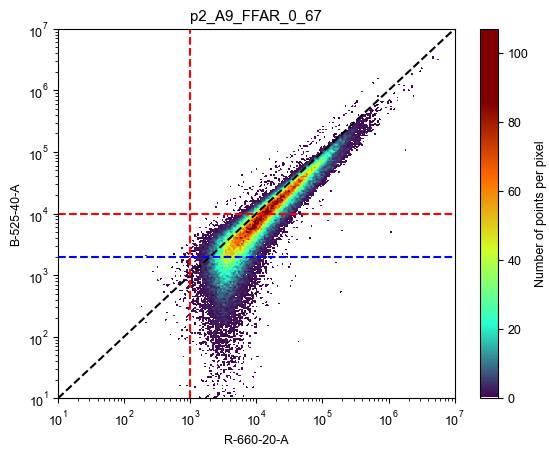

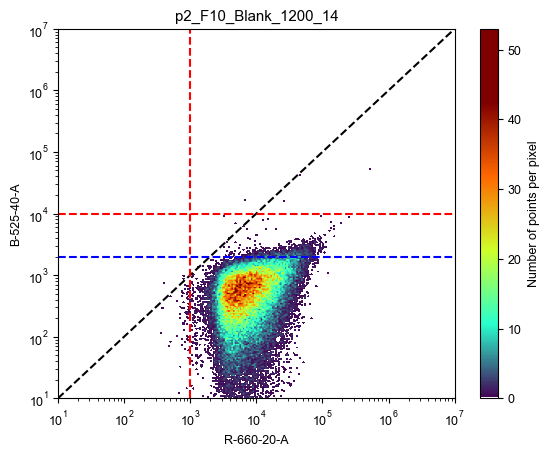

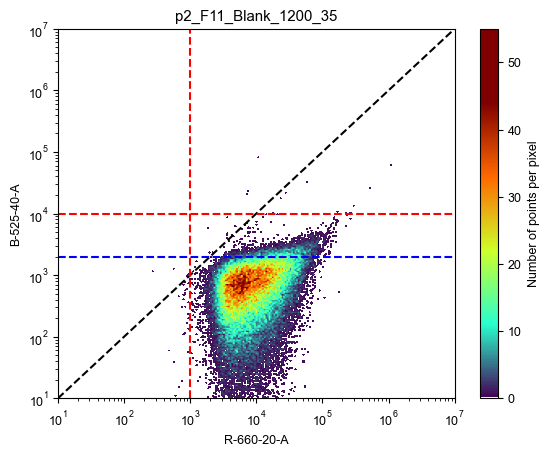

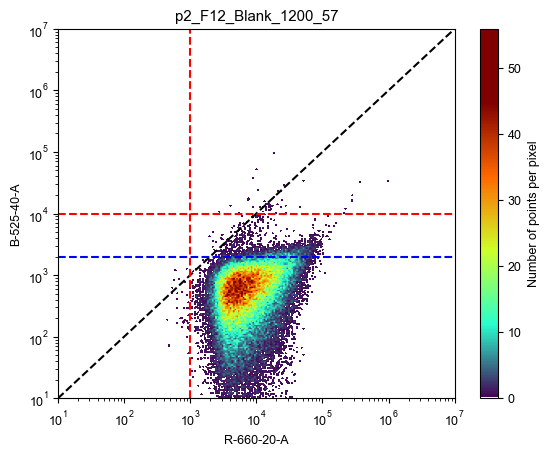

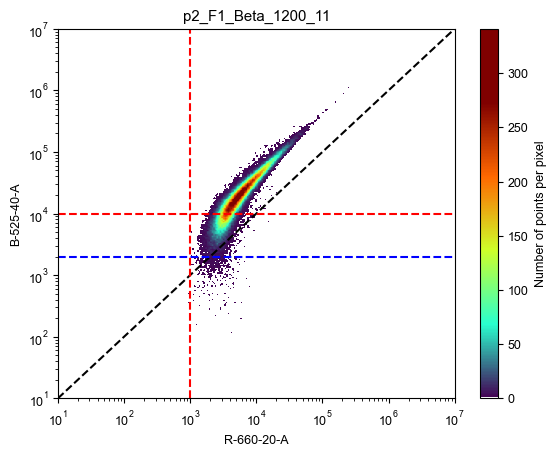

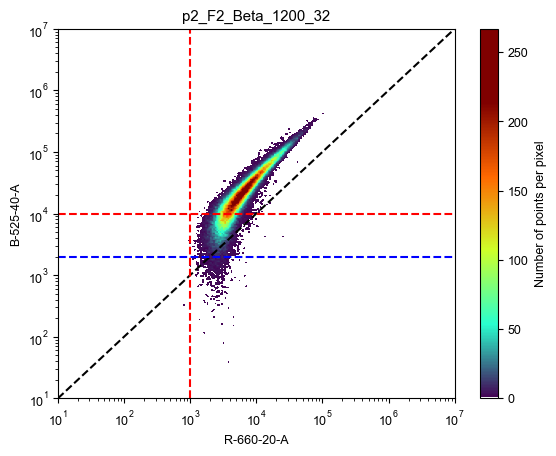

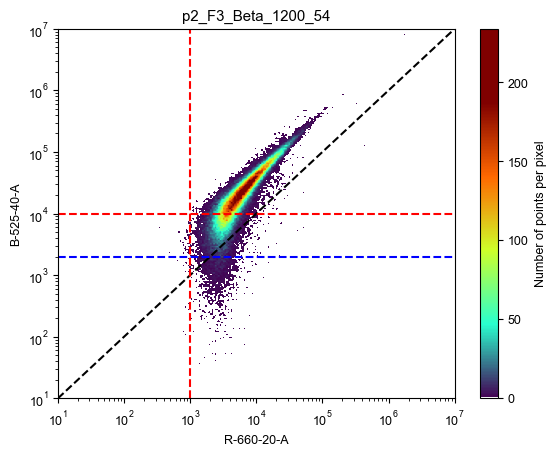

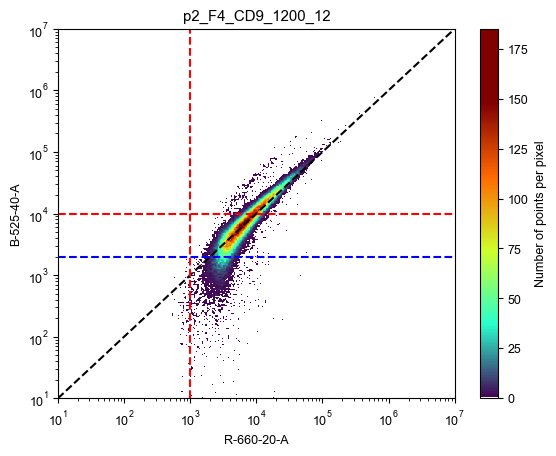

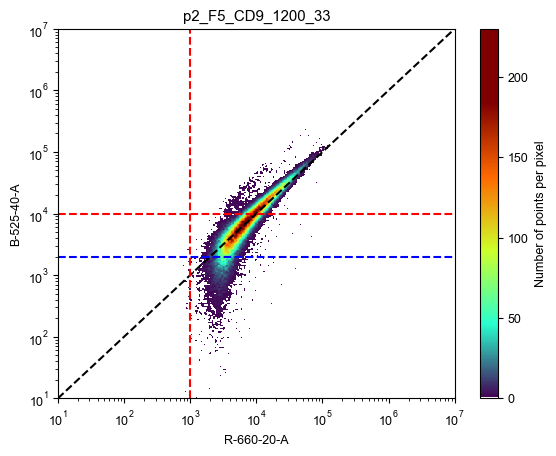

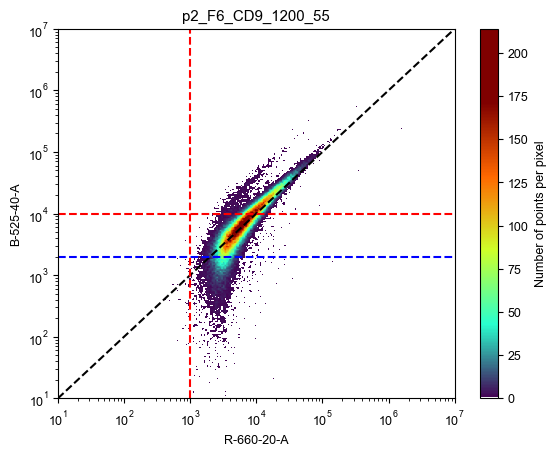

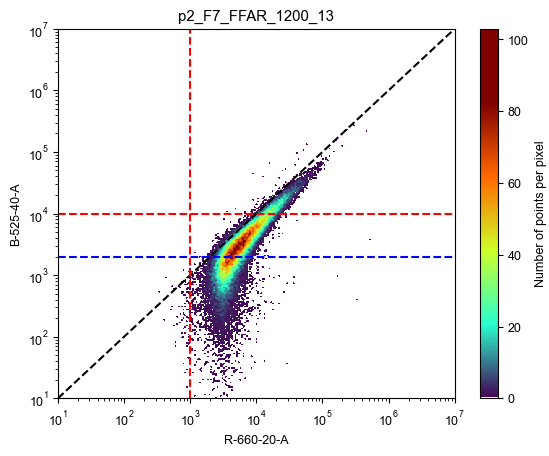

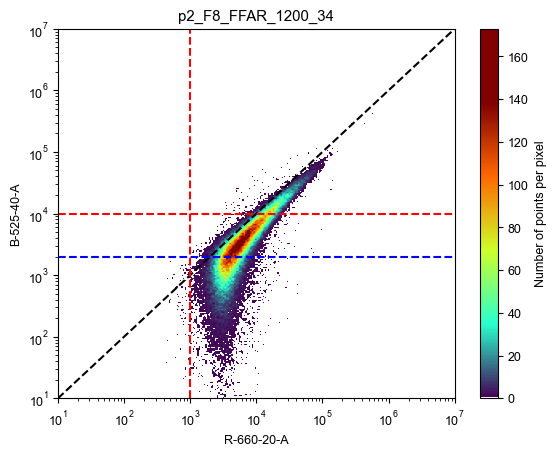

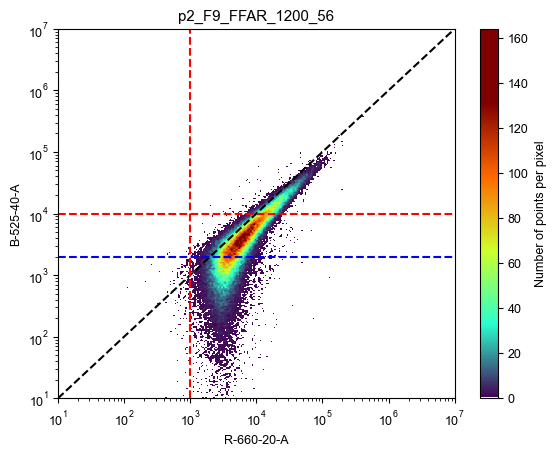

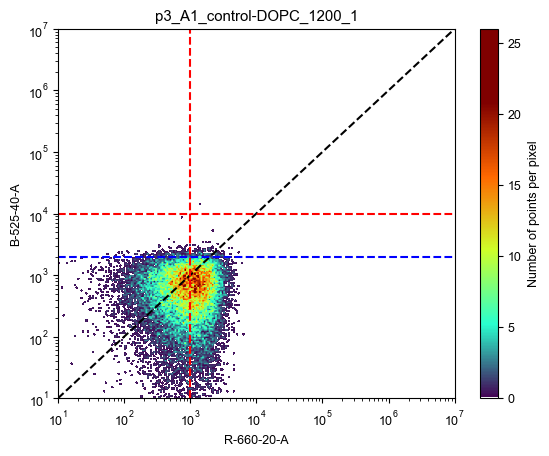

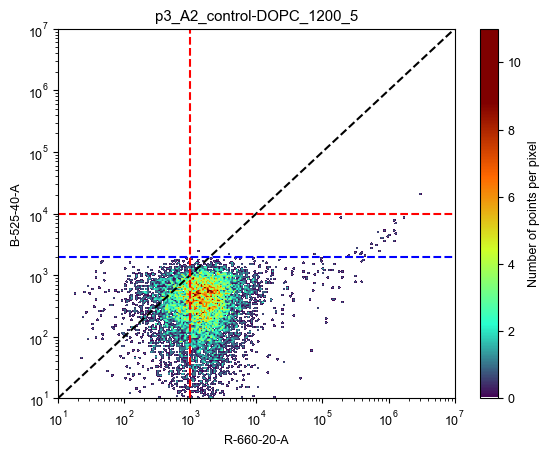

In [15]:
x_label = 'R-660-20-A'
y_label = 'B-525-40-A'

for dna,df in all_data[all_data['lipo_class'] == 'liposome'].groupby('flow_name'):
    x = np.array(df[x_label].tolist())
    y = np.array(df[y_label].tolist())
    
    fig = plt.figure()
    using_mpl_scatter_density(fig, x, y)
    plt.title(dna)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.plot([10**1,10**7],[10**1,10**7],c='k',ls='--')
    plt.axhline(10**4,ls='--',c='red')
    plt.axhline(2000,ls='--',c='blue')
    
    plt.axvline(10**3,ls='--',c='red')
    
    plt.show()

### Investigate the ratio of GFP to Cy5

In [15]:
lipo = all_data[all_data['lipo_class'] == 'liposome'].copy()

In [16]:
lipo['DNA_name'].unique()

array(['Mito', 'OR1A1', 'Dia', 'Cat-DOPC', 'Cat-DMPC', 'Cat-PEG', 'CD47',
       'Blank', 'Beta', 'CD9', 'FFAR', 'control-DOPC'], dtype=object)

In [17]:
lipo['GFP_ratio'] = lipo['B-525-40-A'] / lipo['R-660-20-A']
lipo['GFP_ratio'] = lipo['GFP_ratio'].clip(0.001,10**4)
lipo['GFP_ratio'] = np.log(lipo['GFP_ratio'])
lipo = lipo[lipo['GFP_ratio'].between(-6,6)]
lipo['GFP_ratio'].describe()


count    4.712004e+06
mean    -4.671346e-01
std      1.102888e+00
min     -5.999986e+00
25%     -8.859245e-01
50%     -3.584881e-01
75%      8.847112e-02
max      5.991465e+00
Name: GFP_ratio, dtype: float64

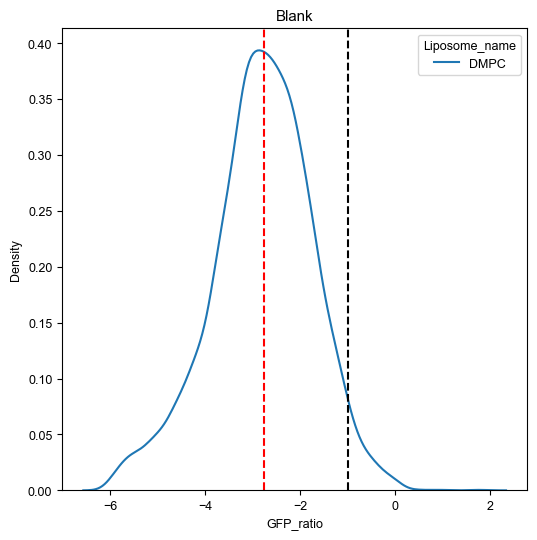

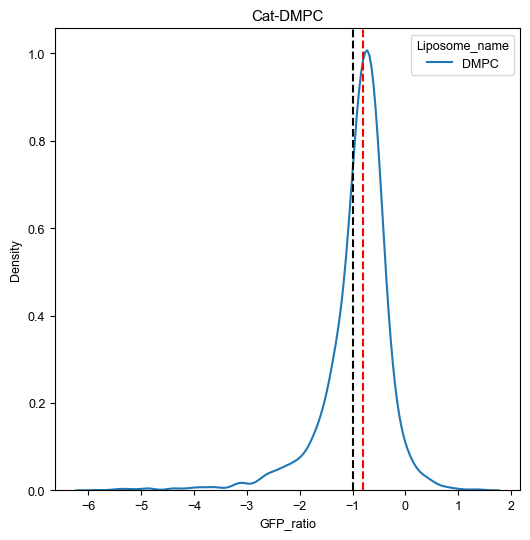

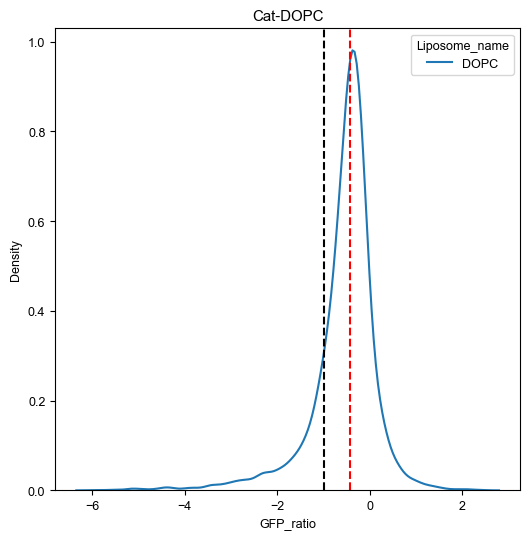

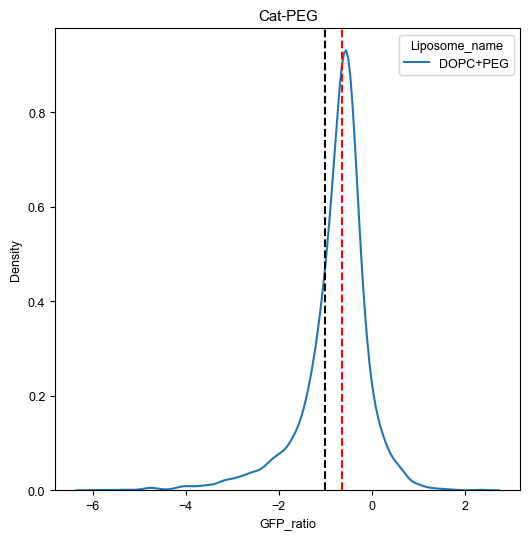

In [18]:
for dna,dna_df in lipo[lipo['DNA_name_meta'].isin(['Blank','Cat'])].groupby('DNA_name'):
    fig,ax = plt.subplots(figsize=[6,6])
    try:
        temp = dna_df.sample(5000)
    except:
        print(s,'too few samples')
        continue
        
    med = np.median(temp['GFP_ratio'])

    sns.kdeplot(data=temp,x='GFP_ratio',hue='Liposome_name',ax=ax)
    plt.axvline(med,color='red',ls='--')
    plt.axvline(-1,color='black',ls='--')
    # plt.axvline(high_thresh,color='black',ls='--')
    plt.title(dna)
    plt.show()

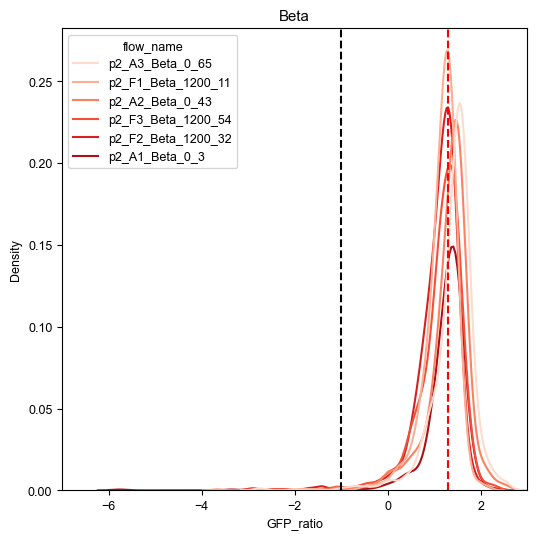

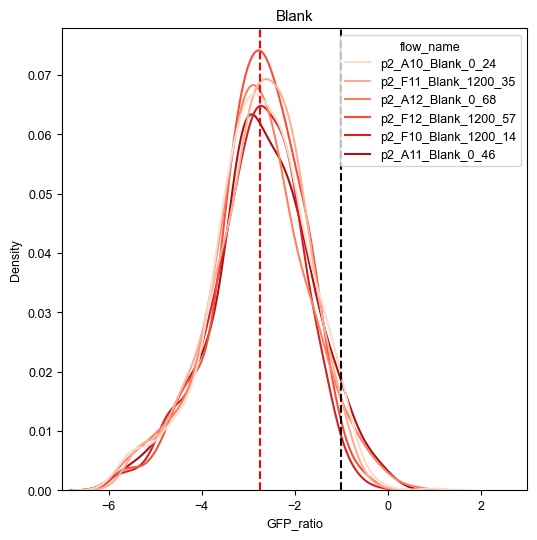

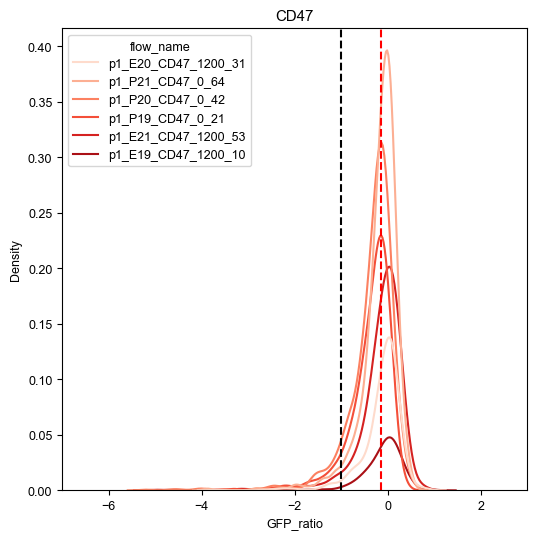

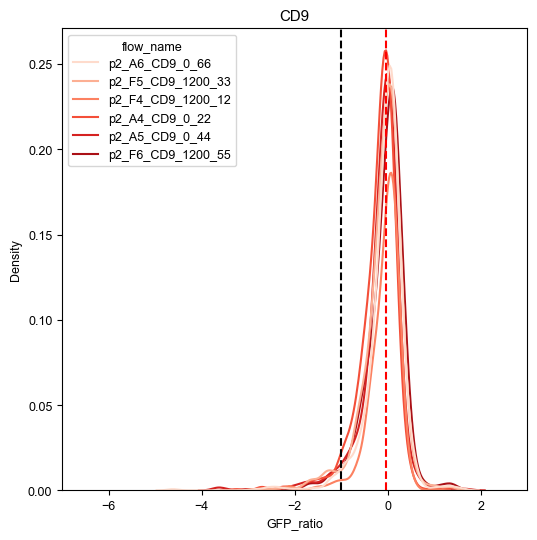

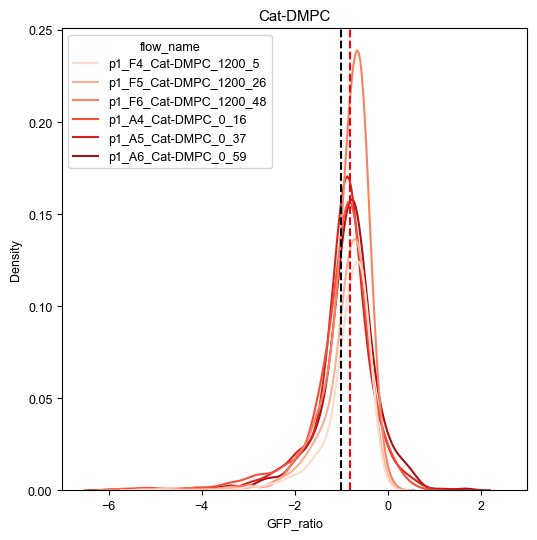

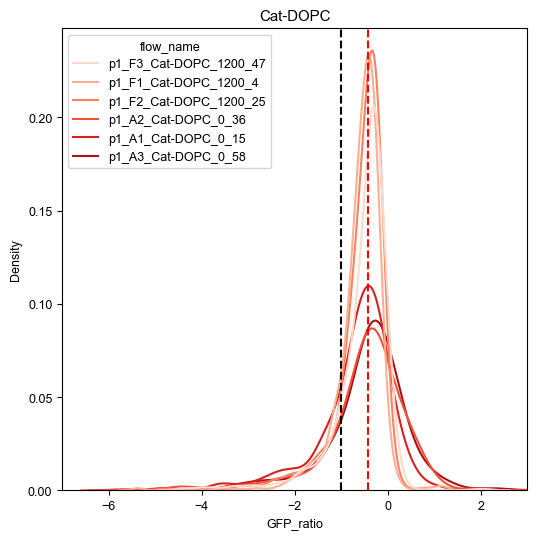

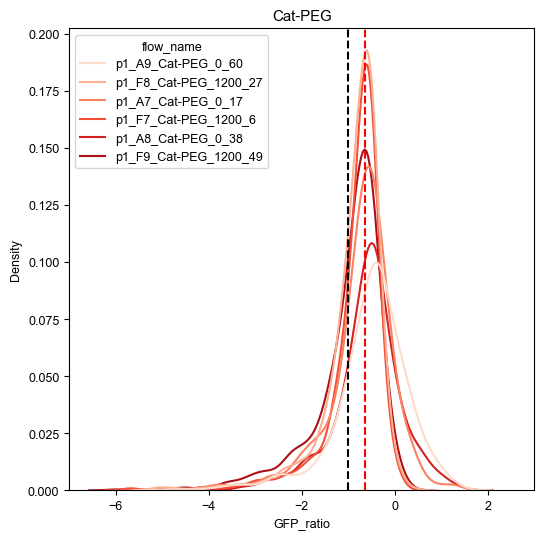

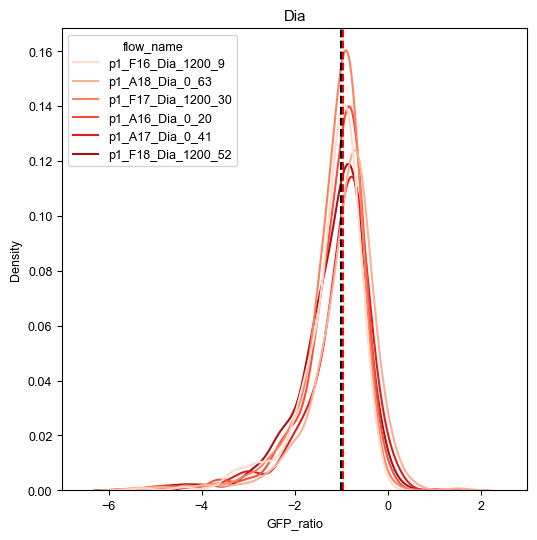

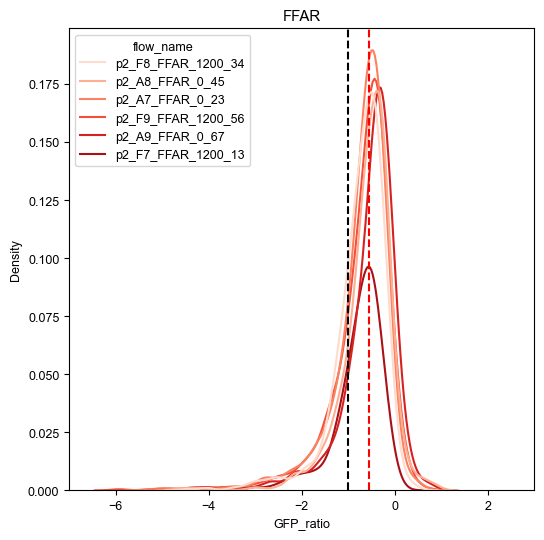

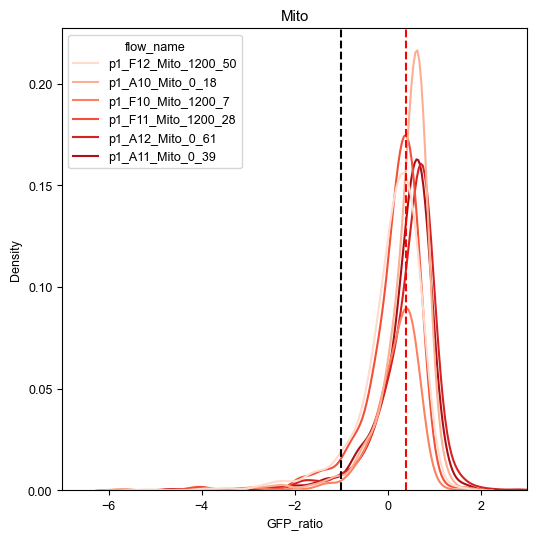

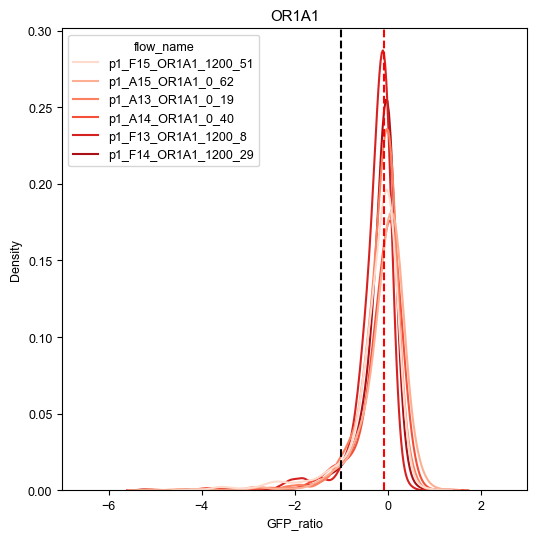

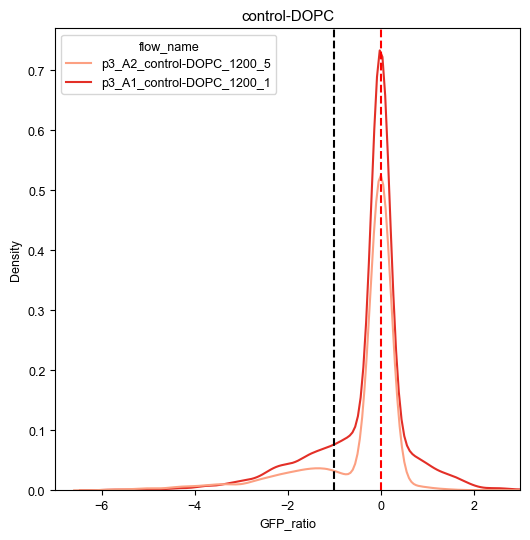

In [19]:
for dna,dna_df in lipo.groupby('DNA_name'):
    fig,ax = plt.subplots(figsize=[6,6])
    temp = dna_df.sample(5000)
    low = temp
    low_med = np.median(low['GFP_ratio'])
    
    sns.kdeplot(data=low,x='GFP_ratio',hue='flow_name',ax=ax,palette='Reds')
    plt.axvline(low_med,color='red',ls='--')
    plt.axvline(-1,color='black',ls='--')
    
    plt.xlim([-7,3])
    plt.title(dna)
    plt.show()

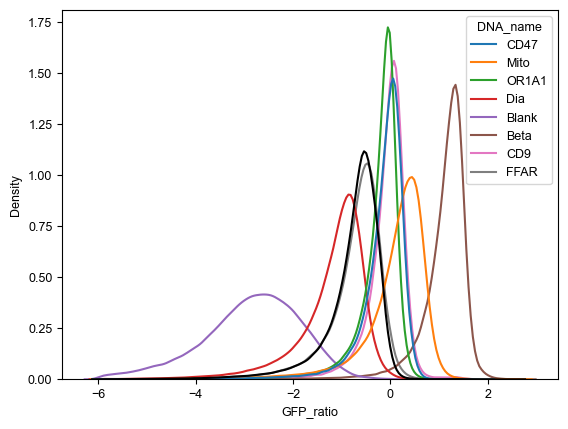

In [20]:
sns.kdeplot(data=lipo[(lipo['DNA_name_meta'] != 'Cat') & (lipo['Volume_meta'] == 1200)],x='GFP_ratio',hue='DNA_name',common_norm=False)
sns.kdeplot(data=lipo[(lipo['DNA_name_meta'] == 'Cat') & (lipo['Volume_meta'] == 1200)],x='GFP_ratio',color='black',common_norm=False)

plt.show()

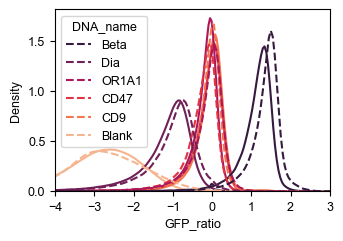

In [21]:
fig,ax = plt.subplots(figsize=[9*cm,6*cm])
hue_order = ['Beta','Dia','OR1A1','CD47','CD9','Blank']

sns.kdeplot(data=lipo[(lipo['DNA_name_meta'].isin(hue_order)) & (lipo['Volume_meta'] == 1200)],x='GFP_ratio',hue='DNA_name',palette='rocket',hue_order=hue_order,common_norm=False)
sns.kdeplot(data=lipo[(lipo['DNA_name_meta'].isin(hue_order)) & (lipo['Volume_meta'] == 0)],ls='--',x='GFP_ratio',hue='DNA_name',palette='rocket',hue_order=hue_order,common_norm=False)
plt.xlim([-4,3])
plt.savefig(f'./Figure_3_exports/Supp_fig-Flow_analysis.svg',format='svg',dpi=300)

plt.show()

In [25]:
temp = lipo[lipo['Volume_meta'].isin([0,1200])].copy()
hue_order = ['Beta','Dia','OR1A1','CD47','CD9','Blank']
temp = temp[temp['DNA_name'].isin(hue_order)]
temp['SEC_status'] = temp['Volume'].astype(str)

# Convert 'Volume' to a categorical variable, 0 = pre-SEC, 1200 = post-SEC
temp['SEC_status'] = temp['Volume'].astype(str)
temp['SEC_status'] = temp['SEC_status'].replace({'0':'pre-SEC', '1200':'post-SEC'})
aggregated_df = temp.groupby(['DNA_name_meta','SEC_status','rep'])['GFP_ratio'].median().reset_index()
aggregated_df = aggregated_df.rename(columns={'GFP_ratio':'median_GFP_ratio','DNA_name_meta':'DNA_name','rep':'Rep'})

aggregated_df.to_excel(f'{data_folder}/Supp_fig_15C-aggregated_flow_analysis.xlsx')
aggregated_df

DNA_name SEC_status  Rep  median_GFP_ratio
0      Beta   post-SEC  1.0          1.212673
1      Beta   post-SEC  2.0          1.199185
2      Beta   post-SEC  3.0          1.236174
3      Beta    pre-SEC  1.0          1.345631
4      Beta    pre-SEC  2.0          1.402712
5      Beta    pre-SEC  3.0          1.501297
6     Blank   post-SEC  1.0         -2.824819
7     Blank   post-SEC  2.0         -2.732796
8     Blank   post-SEC  3.0         -2.705670
9     Blank    pre-SEC  1.0         -2.717588
10    Blank    pre-SEC  2.0         -2.739826
11    Blank    pre-SEC  3.0         -2.776920
12     CD47   post-SEC  1.0         -0.059595
13     CD47   post-SEC  2.0         -0.050873
14     CD47   post-SEC  3.0         -0.031571
15     CD47    pre-SEC  1.0         -0.257733
16     CD47    pre-SEC  2.0         -0.221209
17     CD47    pre-SEC  3.0         -0.088861
18      CD9   post-SEC  1.0         -0.004066
19      CD9   post-SEC  2.0         -0.019262
20      CD9   post-SEC  3.0          0.022312
21      CD9    pre-SEC  1.0         -0.119636
22      CD9    pre-SEC  2.0         -0.038902
23      CD9    pre-SEC  3.0          0.011193
24      Dia   post-SEC  1.0         -1.032234
25      Dia   post-SEC  2.0         -1.016188
26      Dia   post-SEC  3.0         -1.037051
27      Dia    pre-SEC  1.0         -0.947877
28      Dia    pre-SEC  2.0         -0.876374
29      Dia    pre-SEC  3.0         -0.817469
30    OR1A1   post-SEC  1.0         -0.181151
31    OR1A1   post-SEC  2.0         -0.087616
32    OR1A1   post-SEC  3.0         -0.094304
33    OR1A1    pre-SEC  1.0         -0.091652
34    OR1A1    pre-SEC  2.0         -0.032597
35    OR1A1    pre-SEC  3.0          0.040336

In [ ]:
export = lipo[(lipo['DNA_name_meta'].isin(hue_order))]
export = export[['SSC-A','R-660-20-A','B-525-40-A', 'DNA_name',
       'rep', 'Volume', 'scaled_Cy5','GFP_ratio']].copy()
export.set_index('DNA_name').to_pickle(data_folder+'/Supp_Fig_15BC-Additional_prot_flow_ratios.pkl')

In [25]:
cut_labels = ['liposome','background', 'high_gfp','no_cy5']
cut_bins = [-np.inf, -6, -1, 6, np.inf]
lipo['label'] = pd.cut(lipo['GFP_ratio'], bins=cut_bins, labels=cut_labels)
percents = (lipo.groupby(['plate','well_name','label']).agg(len)['GFP_ratio'] / lipo.groupby(['plate','well_name']).agg(len)['GFP_ratio']).reset_index()
percents['GFP_ratio'] = percents['GFP_ratio'].fillna(0)
percents['percent'] = percents['GFP_ratio'] * 100
percents

C:\Users\conar\AppData\Local\Temp\ipykernel_20796\841116165.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percents = (lipo.groupby(['plate','well_name','label']).agg(len)['GFP_ratio'] / lipo.groupby(['plate','well_name']).agg(len)['GFP_ratio']).reset_index()


plate well_name       label  GFP_ratio    percent
0        1        A1    liposome   0.000000   0.000000
1        1        A1  background   0.231052  23.105189
2        1        A1    high_gfp   0.768948  76.894811
3        1        A1      no_cy5   0.000000   0.000000
4        1       A10    liposome   0.000000   0.000000
..     ...       ...         ...        ...        ...
499      3       P20      no_cy5   0.000000   0.000000
500      3       P21    liposome   0.000000   0.000000
501      3       P21  background   0.000000   0.000000
502      3       P21    high_gfp   0.000000   0.000000
503      3       P21      no_cy5   0.000000   0.000000

[504 rows x 5 columns]

In [27]:
percents = percents.set_index(['plate','well_name']).join(meta.set_index(['plate','well_name'])).reset_index()